# Data Dictionary

### Glossary / Data Dictionary / Important Terms:
### 'VIN (1-10)': The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).

### 'County': The county in which the registered owner resides.

### 'City': The city in which the registered owner resides

### 'State': The state in which the registered owner resides

### 'Postal Code': The 5 digit zip code in which the registered owner resides

### 'Model Year': The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN)

### 'Make': The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN)

### 'Model': The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).

### 'Electric Vehicle Type': This distinguishes the vehicle as all electric or a plug-in hybrid.

### 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.

### 'Electric Range': Describes how far a vehicle can travel purely on its electric charge.

### 'Base MSRP': This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.

### 'Legislative District': The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.

### 'DOL Vehicle ID': Unique number assigned to each vehicle by Department of Licensing for identification purposes.

### 'Vehicle Location': The center of the ZIP Code for the registered vehicle.

### 'Electric Utility': This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe | delimits utilities of same TYPE and a double pipe || delimits utilities of different types. We combined vehicle address and Homeland Infrastructure Foundation Level Database (HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.

### '2020 Census Tract': The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID)



In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## import seaborn
import seaborn as sns
import pandas as pd
import warnings
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [222]:
EVPD=pd.read_csv("Electric_Vehicle_Population_Data.csv")
EVPD.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [223]:
EVPD.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,POINT (-122.53756 47.23165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223994,WBY8P8C57K,King,Woodinville,WA,98072.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0.0,45.0,267288801,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [224]:
EVPD.shape

(223995, 17)

In [225]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [226]:
EVPD.columns.unique()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [227]:
EVPD.describe().style.background_gradient(cmap='Blues')


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,223995.000000,223992.000000
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,232932757.324494,52979971627.739632
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,68843291.614731,1531491031.238644
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4385.000000,1001020100.000000
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,200800169.000000,53033009900.000000
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,248299180.000000,53033030305.000000
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,267397276.500000,53053073301.000000
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,479254772.000000,56021001100.000000


In [228]:
EVPD.isna().sum().sort_values(ascending = False)

Legislative District                                 474
Electric Range                                        18
Base MSRP                                             18
Vehicle Location                                      10
2020 Census Tract                                      3
City                                                   3
Electric Utility                                       3
Postal Code                                            3
County                                                 3
DOL Vehicle ID                                         0
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Model                                                  0
Make                                                   0
Model Year                                             0
State                                                  0
Electric Vehicle Type                                  0
dtype: int64

#  Exploratory Data Analysis and Visualization

Text(0.5, 1.0, 'Missing null values')

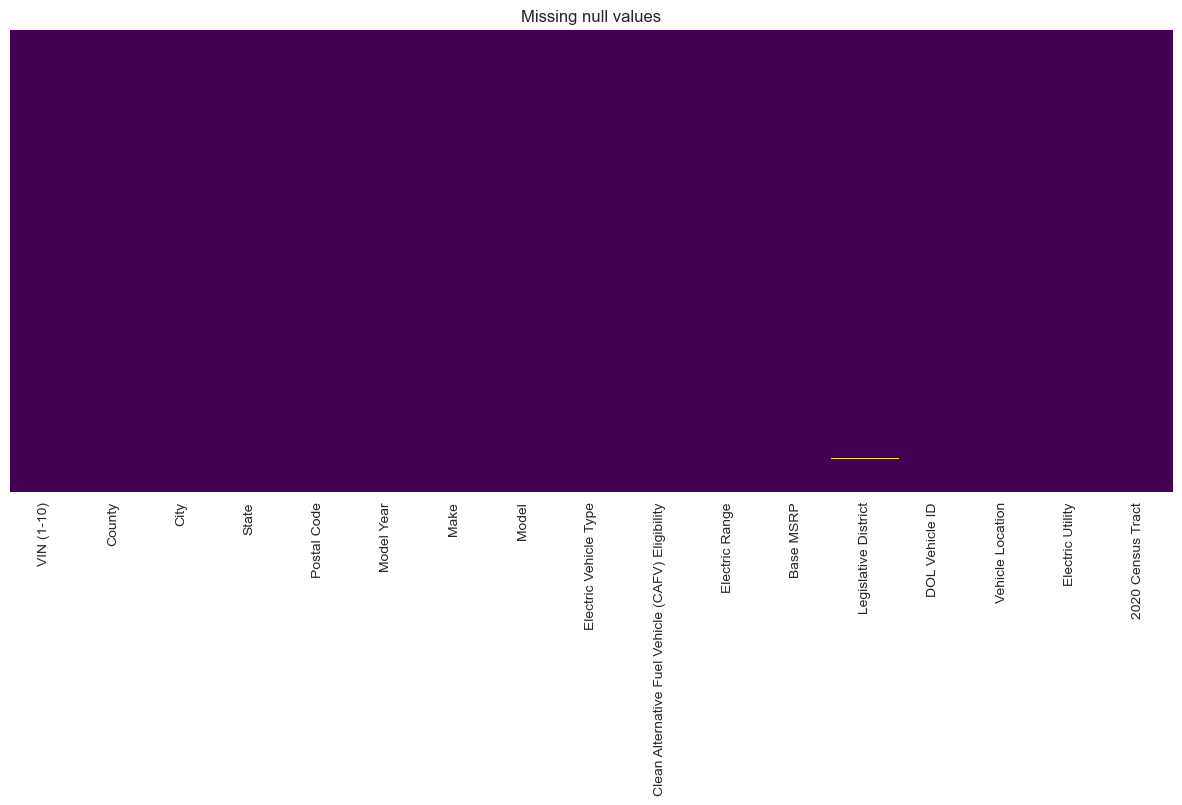

In [229]:
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(EVPD.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

# Figure-2: Provide us the visual on the missing values in a dataframe 'EVPD'

In [230]:
# Get a clearer picture of missing data with this nifty code snippet!
# See the percentage of null values in our dataset sorted in ascending order, making it easy to identify which features have the most missing data.
missing_percentage = (EVPD.isnull().sum().sort_values(ascending = False)/len(EVPD))*100
missing_percentage

Legislative District                                 0.211612
Electric Range                                       0.008036
Base MSRP                                            0.008036
Vehicle Location                                     0.004464
2020 Census Tract                                    0.001339
City                                                 0.001339
Electric Utility                                     0.001339
Postal Code                                          0.001339
County                                               0.001339
DOL Vehicle ID                                       0.000000
VIN (1-10)                                           0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Model                                                0.000000
Make                                                 0.000000
Model Year                                           0.000000
State                                                0.000000
Electric

In [231]:
EVPD['Electric Utility'] = EVPD['Electric Utility'].fillna('Utility Not Avalilable')
EVPD['Legislative District'] = EVPD['Legislative District'].fillna('Unknown')
EVPD['Vehicle Location'] = EVPD['Vehicle Location'].fillna('Unknown')
EVPD['Model'] = EVPD['Model'].fillna('Unknown')
EVPD['2020 Census Tract'] = EVPD['2020 Census Tract'].fillna('Unknown')
EVPD['City'] = EVPD['City'].fillna('Unknown')

# fill null values in the 'Postal Code' column with the mean salary
mean_postcode = EVPD['Postal Code'].mean()
EVPD['Postal Code'] = EVPD['Postal Code'].fillna(mean_postcode)

EVPD['County'] = EVPD['County'].fillna('Unknown')

In [232]:
# Get a clearer picture of missing data with this nifty code snippet! 
# See the percentage of null values in our dataset sorted in ascending order, making it easy to identify which features have the most missing data.
missing_percentage1 = (EVPD.isnull().sum().sort_values(ascending = False)/len(EVPD))*100
missing_percentage1

Base MSRP                                            0.008036
Electric Range                                       0.008036
VIN (1-10)                                           0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Utility                                     0.000000
Vehicle Location                                     0.000000
DOL Vehicle ID                                       0.000000
Legislative District                                 0.000000
Electric Vehicle Type                                0.000000
County                                               0.000000
Model                                                0.000000
Make                                                 0.000000
Model Year                                           0.000000
Postal Code                                          0.000000
State                                                0.000000
City                                                 0.000000
2020 Cen

In [233]:
# convert the 'Postal Code ' attribute from float to integer
EVPD['Postal Code'] = EVPD['Postal Code'].astype(int)

In [234]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223995 non-null  object 
 2   City                                               223995 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223995 non-null  int32  
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [235]:
# rename columns 
EVPD = EVPD.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Electric_Vehicle_Type', 
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                        'Electric Range':'Electric_Range', 'Base MSRP': 'Base_MSRP', 'Legislative District':'Legislative_District',
                        'DOL Vehicle ID': 'DOL_Vehicle_ID',
                        'Vehicle Location':'Vehicle_Location',
                        'Electric Utility':'Electric_Utility',
                        '2020 Census Tract':'2020_Census_Tract',
                        'VIN (1-10)':'VIN'})


In [236]:
EVPD.columns

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [237]:
EVPD.isnull().sum().sort_values(ascending = False)


Base_MSRP                18
Electric_Range           18
VIN                       0
CAFV_Eligibility          0
Electric_Utility          0
Vehicle_Location          0
DOL_Vehicle_ID            0
Legislative_District      0
Electric_Vehicle_Type     0
County                    0
Model                     0
Make                      0
ModelYear                 0
PostalCode                0
State                     0
City                      0
2020_Census_Tract         0
dtype: int64

In [238]:
EVPD.columns.unique()


Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [239]:
EVPD['Base_MSRP'].value_counts()

Base_MSRP
0.0         220717
69900.0       1315
31950.0        364
52900.0        218
32250.0        139
59900.0        121
54950.0        118
39995.0        117
36900.0        104
44100.0         95
64950.0         88
45600.0         75
33950.0         71
52650.0         71
34995.0         67
55700.0         57
36800.0         54
53400.0         39
81100.0         23
98950.0         22
110950.0        20
90700.0         17
102000.0        12
75095.0         12
184400.0        11
43700.0          8
109000.0         7
89100.0          7
91250.0          4
32995.0          3
845000.0         1
Name: count, dtype: int64

In [240]:
EVPD['Base_MSRP'].fillna('0',inplace=True)

In [241]:
EVPD['Electric_Range'].value_counts()

Electric_Range
0.0      130442
215.0      6296
32.0       5254
25.0       4559
21.0       4458
          ...  
11.0          4
51.0          4
95.0          3
57.0          2
74.0          2
Name: count, Length: 109, dtype: int64

In [242]:
EVPD['Electric_Range'].fillna('0',inplace=True)

In [243]:
EVPD.isnull().sum().sort_values(ascending = False)


VIN                      0
CAFV_Eligibility         0
Electric_Utility         0
Vehicle_Location         0
DOL_Vehicle_ID           0
Legislative_District     0
Base_MSRP                0
Electric_Range           0
Electric_Vehicle_Type    0
County                   0
Model                    0
Make                     0
ModelYear                0
PostalCode               0
State                    0
City                     0
2020_Census_Tract        0
dtype: int64

In [244]:
# Find duplications and Analyse them if its a valid Duplication.
EVPD.duplicated().any()

False

In [245]:

EVPD.columns.unique()

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [246]:
any_duplicates = EVPD.duplicated(subset=['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract']).any()

In [247]:
any_duplicates

False

In [248]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VIN                    223995 non-null  object
 1   County                 223995 non-null  object
 2   City                   223995 non-null  object
 3   State                  223995 non-null  object
 4   PostalCode             223995 non-null  int32 
 5   ModelYear              223995 non-null  int64 
 6   Make                   223995 non-null  object
 7   Model                  223995 non-null  object
 8   Electric_Vehicle_Type  223995 non-null  object
 9   CAFV_Eligibility       223995 non-null  object
 10  Electric_Range         223995 non-null  object
 11  Base_MSRP              223995 non-null  object
 12  Legislative_District   223995 non-null  object
 13  DOL_Vehicle_ID         223995 non-null  int64 
 14  Vehicle_Location       223995 non-null  object
 15  

#  Describe the Dataset

In [249]:
EVPD.describe().style.background_gradient(cmap='Blues')


,PostalCode,ModelYear,DOL_Vehicle_ID
count,223995.000000,223995.000000,223995.000000
mean,98176.491158,2021.264408,232932757.324494
std,2544.223471,2.989676,68843291.614731
min,1731.000000,1999.000000,4385.000000
25%,98052.000000,2020.000000,200800169.000000
50%,98126.000000,2022.000000,248299180.000000
75%,98374.000000,2023.000000,267397276.500000
max,99577.000000,2025.000000,479254772.000000


In [250]:
#We can see the number of non-missing data for each title.
EVPD.notnull().sum()

VIN                      223995
County                   223995
City                     223995
State                    223995
PostalCode               223995
ModelYear                223995
Make                     223995
Model                    223995
Electric_Vehicle_Type    223995
CAFV_Eligibility         223995
Electric_Range           223995
Base_MSRP                223995
Legislative_District     223995
DOL_Vehicle_ID           223995
Vehicle_Location         223995
Electric_Utility         223995
2020_Census_Tract        223995
dtype: int64

In [251]:
EVPD.VIN.value_counts()

VIN
7SAYGDEE7P    1179
7SAYGDEE6P    1168
7SAYGDEE5P    1137
7SAYGDEEXP    1131
7SAYGDEE8P    1120
              ... 
7JDEV3VL0S       1
WP0AD2Y1XP       1
2T3YL4DVXC       1
1G1RC6E44E       1
1GT10BDD8S       1
Name: count, Length: 13175, dtype: int64

In [252]:
EVPD.County.value_counts()

County
King          113169
Snohomish      27186
Pierce         18026
Clark          13452
Thurston        8252
               ...  
Tom Green          1
Wasco              1
Hays               1
Hennepin           1
James City         1
Name: count, Length: 208, dtype: int64

In [253]:
EVPD.City.value_counts()

City
Seattle       35664
Bellevue      10966
Vancouver      8103
Redmond        7772
Bothell        7298
              ...  
Folsom            1
Lakeside          1
Providence        1
Atherton          1
Kailua            1
Name: count, Length: 790, dtype: int64

In [254]:
EVPD.State.value_counts()

State
WA    223521
CA       114
VA        59
MD        39
TX        30
NC        19
CO        17
GA        15
FL        15
IL        11
CT        10
NY        10
AZ         9
NV         9
NJ         9
MA         8
AL         8
OR         8
SC         7
PA         6
KS         6
MI         6
MO         6
HI         5
KY         5
DC         4
RI         4
OH         4
ID         4
NE         3
TN         3
NM         2
UT         2
ME         2
DE         2
LA         1
NH         1
WY         1
IN         1
BC         1
MN         1
OK         1
NS         1
MS         1
AK         1
WI         1
AE         1
AR         1
Name: count, dtype: int64

In [255]:
EVPD.PostalCode.value_counts()

PostalCode
98052    5511
98012    4209
98033    3680
98006    3477
98188    3320
         ... 
95630       1
31907       1
80921       1
90038       1
89118       1
Name: count, Length: 955, dtype: int64

In [256]:
EVPD.Make.value_counts()


Make
TESLA                     96180
CHEVROLET                 16405
NISSAN                    15259
FORD                      11930
KIA                       10760
BMW                        9171
TOYOTA                     8956
HYUNDAI                    6878
RIVIAN                     6236
JEEP                       5773
VOLKSWAGEN                 5740
VOLVO                      5565
AUDI                       4157
CHRYSLER                   3733
MERCEDES-BENZ              2239
SUBARU                     1830
HONDA                      1802
PORSCHE                    1377
POLESTAR                   1222
MINI                       1085
MITSUBISHI                 1065
CADILLAC                   1027
MAZDA                       915
LEXUS                       862
FIAT                        758
DODGE                       733
LUCID                       357
LINCOLN                     336
GENESIS                     319
GMC                         302
SMART                       242
JAG

In [257]:
EVPD.ModelYear.value_counts()

ModelYear
2023    59060
2024    45525
2022    28610
2021    20278
2018    14142
2020    12103
2019    10874
2017     8433
2016     5358
2025     5007
2015     4680
2013     4258
2014     3404
2012     1513
2011      692
2010       23
2008       23
2000        7
2002        2
1999        2
2003        1
Name: count, dtype: int64

In [258]:
EVPD.Model.value_counts()

Model
MODEL Y           46583
MODEL 3           34462
LEAF              13735
MODEL S            7765
BOLT EV            7008
                  ...  
PROMASTER 3500        2
MIRAI                 1
918                   1
FLYING SPUR           1
SIERRA EV             1
Name: count, Length: 164, dtype: int64

In [259]:
EVPD['Electric_Vehicle_Type'].value_counts()

Electric_Vehicle_Type
Battery Electric Vehicle (BEV)            177151
Plug-in Hybrid Electric Vehicle (PHEV)     46844
Name: count, dtype: int64

In [260]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VIN                    223995 non-null  object
 1   County                 223995 non-null  object
 2   City                   223995 non-null  object
 3   State                  223995 non-null  object
 4   PostalCode             223995 non-null  int32 
 5   ModelYear              223995 non-null  int64 
 6   Make                   223995 non-null  object
 7   Model                  223995 non-null  object
 8   Electric_Vehicle_Type  223995 non-null  object
 9   CAFV_Eligibility       223995 non-null  object
 10  Electric_Range         223995 non-null  object
 11  Base_MSRP              223995 non-null  object
 12  Legislative_District   223995 non-null  object
 13  DOL_Vehicle_ID         223995 non-null  int64 
 14  Vehicle_Location       223995 non-null  object
 15  

In [261]:
EVPD['CAFV_Eligibility'].value_counts()

CAFV_Eligibility
Eligibility unknown as battery range has not been researched    130442
Clean Alternative Fuel Vehicle Eligible                          71438
Not eligible due to low battery range                            22115
Name: count, dtype: int64

In [262]:
EVPD['Electric_Range'].value_counts()

Electric_Range
0.0      130442
215.0      6296
32.0       5254
25.0       4559
21.0       4458
          ...  
11.0          4
51.0          4
95.0          3
57.0          2
74.0          2
Name: count, Length: 110, dtype: int64

In [263]:
top_types = EVPD['County'].value_counts().nlargest(29).index
top_types

Index(['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston', 'Kitsap', 'Spokane',
       'Whatcom', 'Benton', 'Skagit', 'Island', 'Yakima', 'Chelan', 'Clallam',
       'Jefferson', 'Cowlitz', 'San Juan', 'Mason', 'Lewis', 'Grant',
       'Kittitas', 'Franklin', 'Grays Harbor', 'Walla Walla', 'Douglas',
       'Whitman', 'Klickitat', 'Okanogan', 'Pacific'],
      dtype='object', name='County')

In [264]:
EVPD['County_modified'] = EVPD['County'].where(EVPD['County'].isin(top_types), 'Other')
EVPD['County_modified']

0            Kitsap
1         Snohomish
2              King
3              King
4            Yakima
            ...    
223990       Pierce
223991    Snohomish
223992       Pierce
223993       Pierce
223994         King
Name: County_modified, Length: 223995, dtype: object

In [265]:
counts = EVPD['County_modified'].value_counts()

In [266]:
counts

County_modified
King            113169
Snohomish        27186
Pierce           18026
Clark            13452
Thurston          8252
Kitsap            7476
Spokane           6294
Whatcom           5447
Benton            2892
Skagit            2523
Island            2401
Yakima            1418
Other             1408
Chelan            1355
Clallam           1346
Jefferson         1186
Cowlitz           1153
San Juan          1102
Mason             1059
Lewis             1025
Grant              822
Kittitas           820
Franklin           817
Grays Harbor       816
Walla Walla        605
Douglas            496
Whitman            436
Klickitat          390
Okanogan           346
Pacific            277
Name: count, dtype: int64

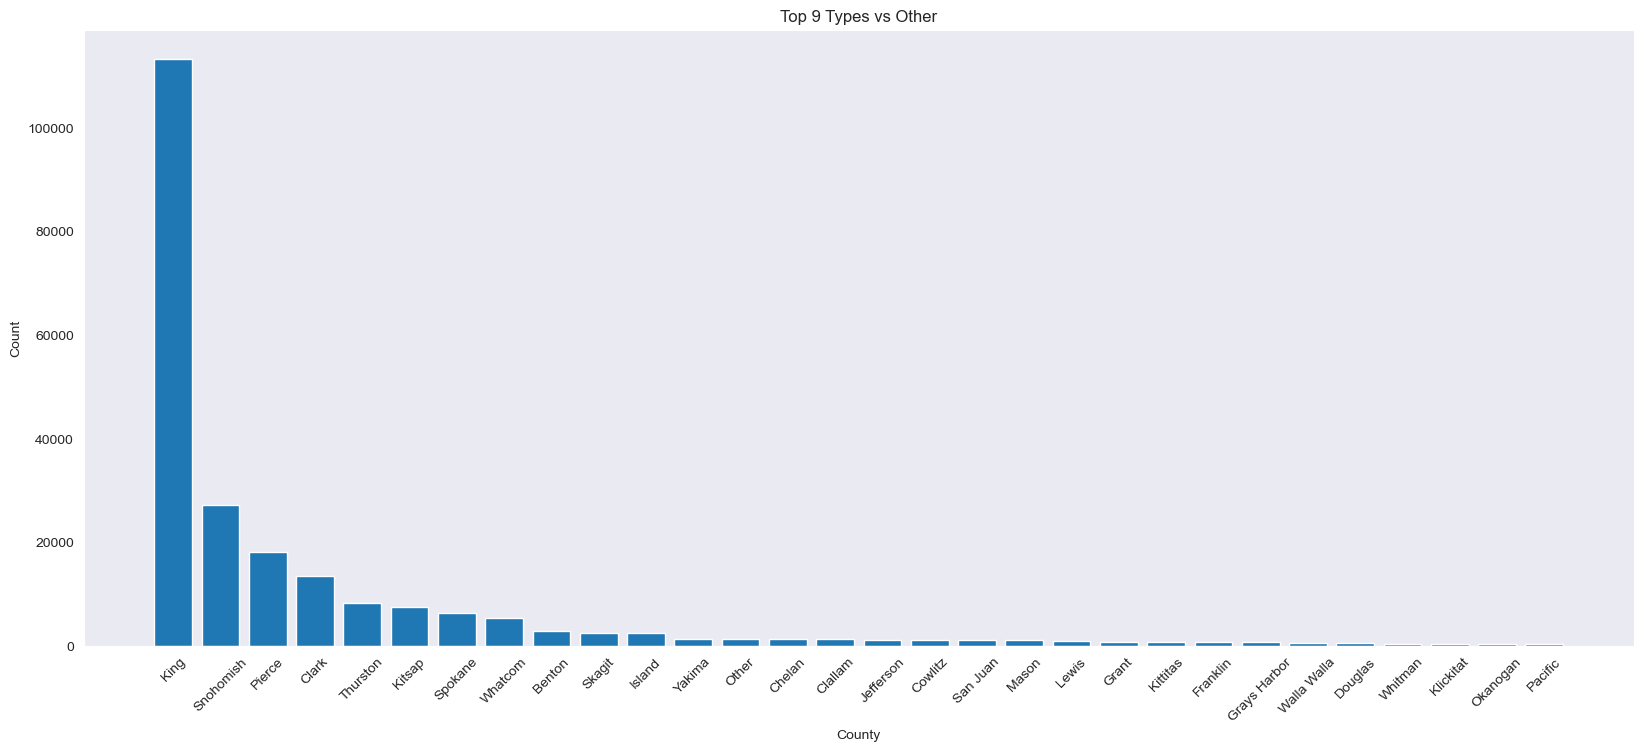

In [267]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

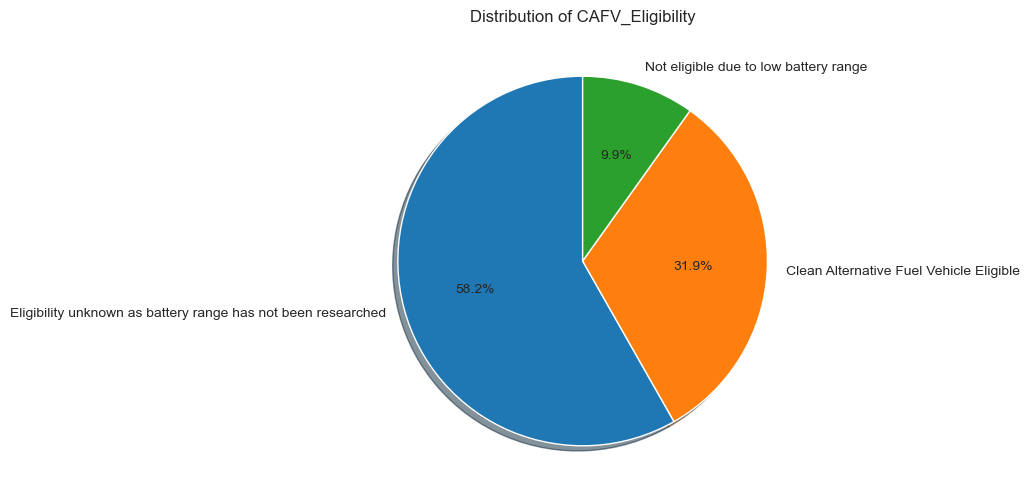

In [268]:
EVPD['CAFV_Eligibility'].value_counts().plot.pie(
    autopct='%1.1f%%', shadow=True, startangle=90, figsize=(6,6)
)
plt.ylabel('')  # Removes y-axis label
plt.title('Distribution of CAFV_Eligibility')
plt.show()

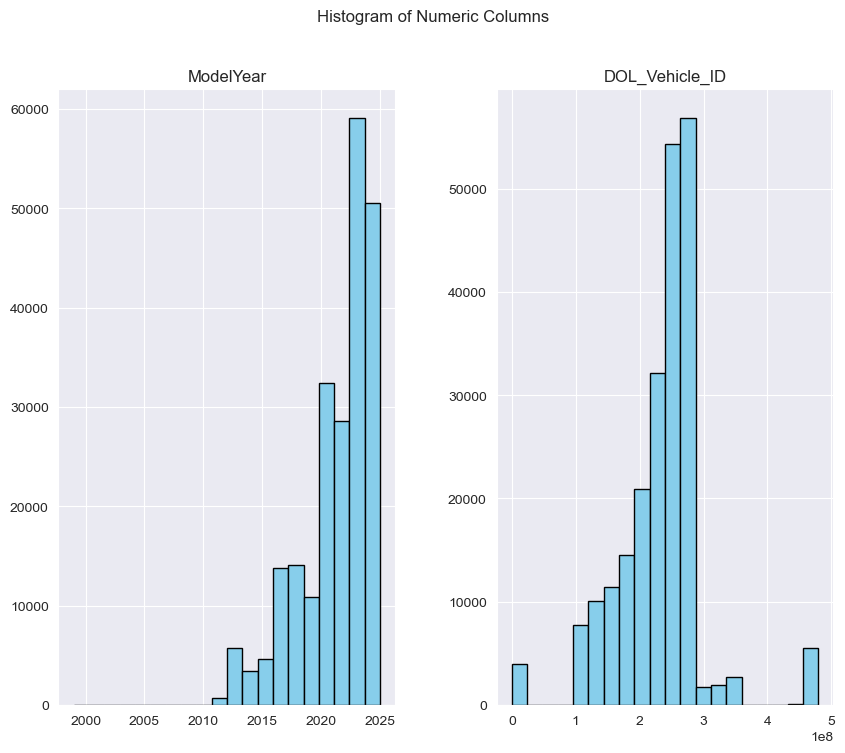

In [269]:
#Selecting numeric columns
numeric_cols = EVPD.select_dtypes(include=['float64', 'int64']).columns

#Creating a histogram for each numerical column
EVPD[numeric_cols].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')

#Adding title
plt.suptitle('Histogram of Numeric Columns')
plt.show()

In [270]:
top_types = EVPD['City'].value_counts().nlargest(29).index
top_types

Index(['Seattle', 'Bellevue', 'Vancouver', 'Redmond', 'Bothell', 'Renton',
       'Kirkland', 'Sammamish', 'Olympia', 'Tacoma', 'Kent', 'Spokane',
       'Bellingham', 'Lynnwood', 'Everett', 'Issaquah', 'Tukwila',
       'Woodinville', 'Mercer Island', 'Auburn', 'Snohomish', 'Gig Harbor',
       'Shoreline', 'Edmonds', 'Bainbridge Island', 'Camas', 'Federal Way',
       'Maple Valley', 'Lake Stevens'],
      dtype='object', name='City')

In [271]:
EVPD['City_Modified'] = EVPD['City'].where(EVPD['City'].isin(top_types), 'Other')
EVPD['City_Modified']

0                Other
1         Lake Stevens
2              Seattle
3              Seattle
4                Other
              ...     
223990           Other
223991    Lake Stevens
223992           Other
223993           Other
223994     Woodinville
Name: City_Modified, Length: 223995, dtype: object

In [272]:
counts = counts = EVPD['City_Modified'].value_counts()
counts

City_Modified
Other                72238
Seattle              35664
Bellevue             10966
Vancouver             8103
Redmond               7772
Bothell               7298
Renton                6463
Kirkland              6438
Sammamish             6290
Olympia               5419
Tacoma                4818
Kent                  3824
Spokane               3710
Bellingham            3695
Lynnwood              3577
Everett               3394
Issaquah              3334
Tukwila               3243
Woodinville           2825
Mercer Island         2773
Auburn                2563
Snohomish             2554
Gig Harbor            2428
Shoreline             2424
Edmonds               2320
Bainbridge Island     2066
Camas                 1992
Federal Way           1973
Maple Valley          1940
Lake Stevens          1891
Name: count, dtype: int64

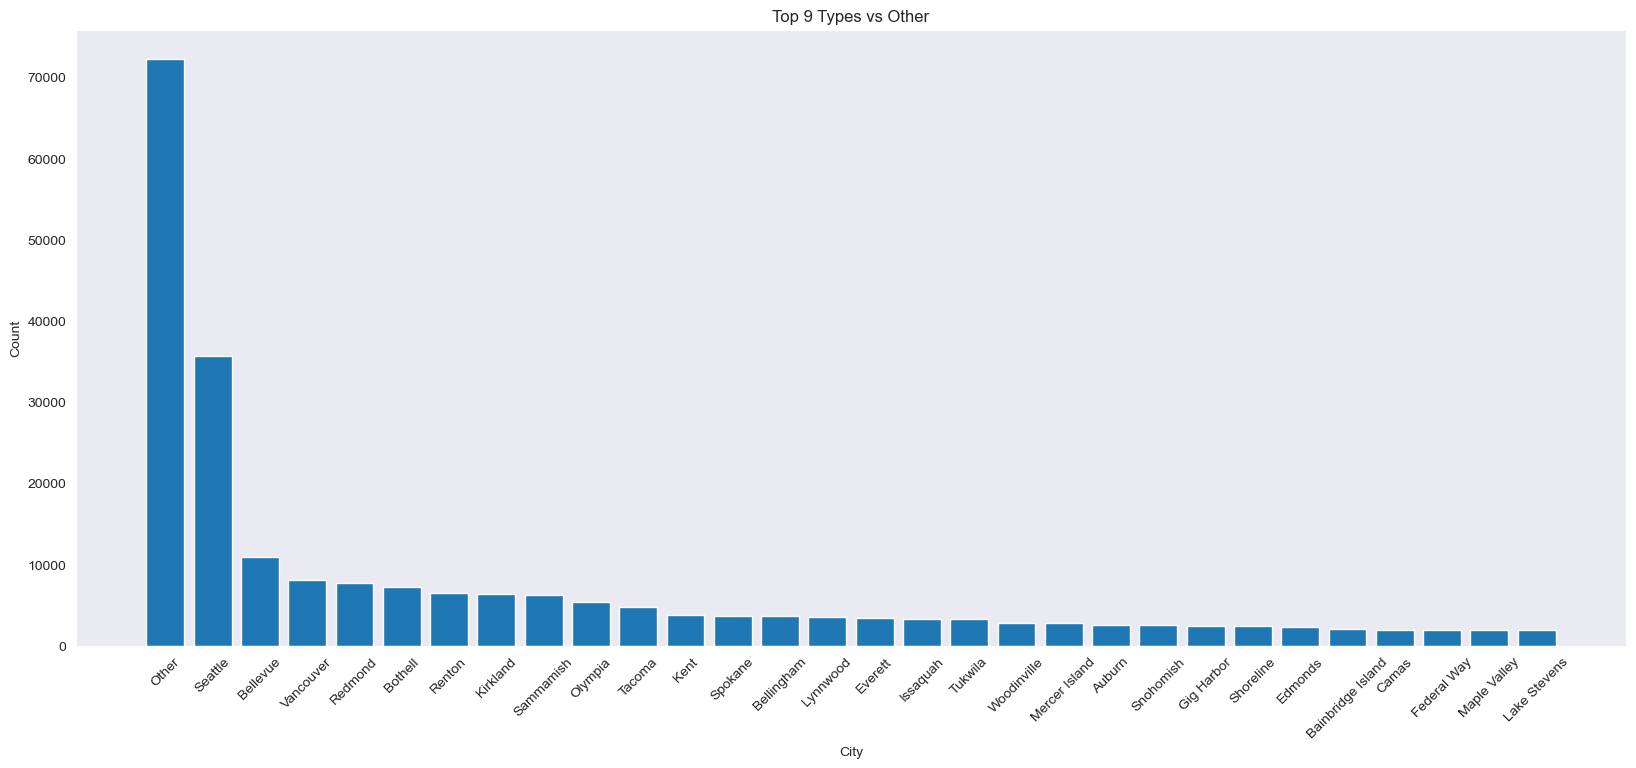

In [273]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

In [274]:
top_types = EVPD['State'].value_counts().nlargest(29).index
top_types

Index(['WA', 'CA', 'VA', 'MD', 'TX', 'NC', 'CO', 'GA', 'FL', 'IL', 'CT', 'NY',
       'AZ', 'NV', 'NJ', 'MA', 'AL', 'OR', 'SC', 'PA', 'KS', 'MI', 'MO', 'HI',
       'KY', 'DC', 'RI', 'OH', 'ID'],
      dtype='object', name='State')

In [275]:
EVPD['State_Modified'] = EVPD['State'].where(EVPD['State'].isin(top_types), 'Other')
EVPD['State_Modified']

0         WA
1         WA
2         WA
3         WA
4         WA
          ..
223990    WA
223991    WA
223992    WA
223993    WA
223994    WA
Name: State_Modified, Length: 223995, dtype: object

In [276]:
counts = counts =EVPD['State_Modified'].value_counts()
counts

State_Modified
WA       223521
CA          114
VA           59
MD           39
TX           30
Other        27
NC           19
CO           17
FL           15
GA           15
IL           11
CT           10
NY           10
AZ            9
NV            9
NJ            9
MA            8
OR            8
AL            8
SC            7
MI            6
PA            6
KS            6
MO            6
KY            5
HI            5
RI            4
DC            4
ID            4
OH            4
Name: count, dtype: int64

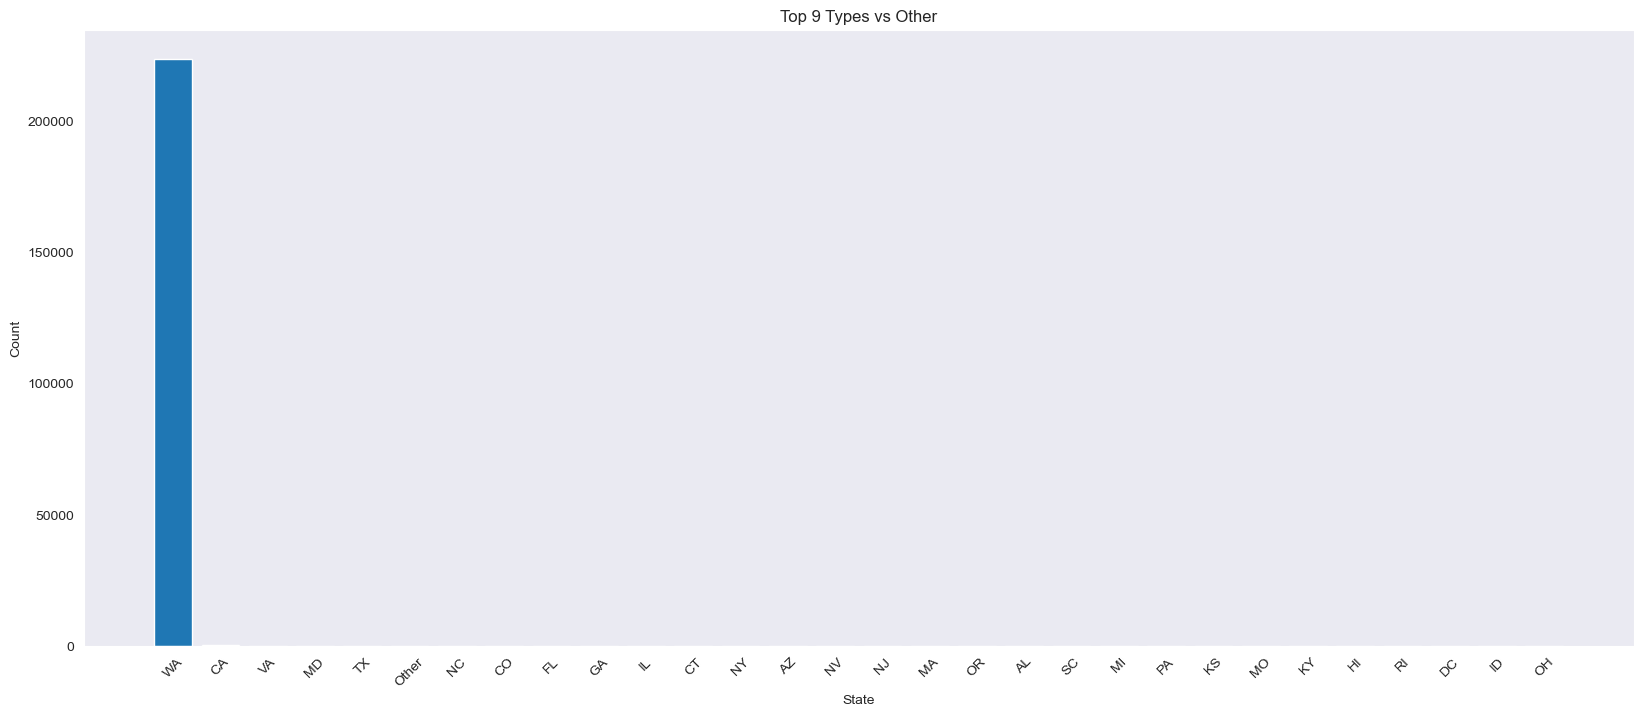

In [277]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

In [278]:
top_types = EVPD['PostalCode'].value_counts().nlargest(29).index
top_types

Index([98052, 98012, 98033, 98006, 98188, 98004, 98115, 98074, 98072, 98034,
       98040, 98103, 98075, 98501, 98021, 98059, 98029, 98117, 98110, 98053,
       98607, 98027, 98038, 98118, 98258, 98008, 98391, 98105, 98125],
      dtype='int32', name='PostalCode')

In [279]:
EVPD['PostalCode_Modified'] = EVPD['PostalCode'].where(EVPD['PostalCode'].isin(top_types), 'Other')
EVPD['PostalCode_Modified']

0         Other
1         98258
2         Other
3         Other
4         Other
          ...  
223990    Other
223991    98258
223992    Other
223993    Other
223994    98072
Name: PostalCode_Modified, Length: 223995, dtype: object

In [280]:
counts = counts =EVPD['PostalCode_Modified'].value_counts()
counts

PostalCode_Modified
Other    147946
98052      5511
98012      4209
98033      3680
98006      3477
98188      3320
98004      3289
98115      3266
98074      3009
98072      2918
98034      2833
98040      2773
98103      2596
98075      2515
98501      2475
98021      2467
98059      2444
98029      2291
98117      2134
98110      2066
98053      2059
98607      1992
98027      1962
98038      1895
98118      1894
98258      1891
98008      1830
98391      1776
98105      1758
98125      1719
Name: count, dtype: int64

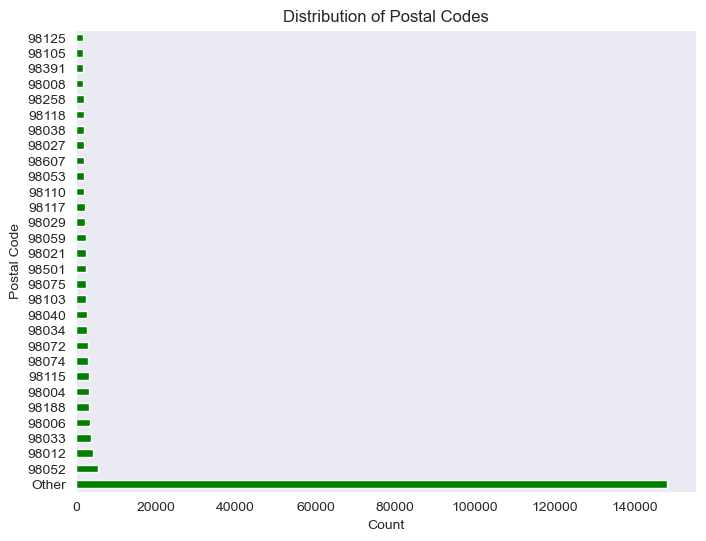

In [281]:
counts.plot(kind='barh', color='green', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Postal Code")
plt.title("Distribution of Postal Codes")
plt.show()

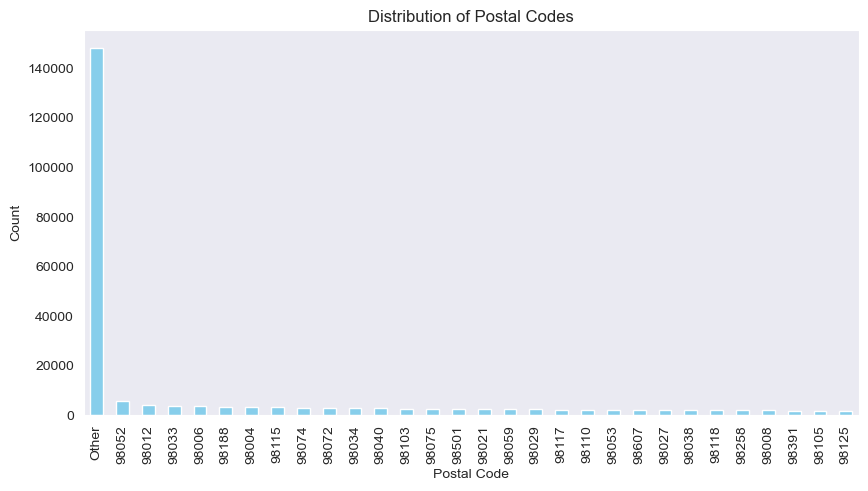

In [282]:
counts = EVPD['PostalCode_Modified'].value_counts()

plt.figure(figsize=(10, 5))
counts.plot(kind='bar', color='skyblue')
plt.xlabel("Postal Code")
plt.ylabel("Count")
plt.title("Distribution of Postal Codes")
plt.xticks(rotation=90)
plt.show()

In [283]:
top_types = EVPD['Make'].value_counts().nlargest(29).index
top_types

Index(['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA', 'BMW', 'TOYOTA',
       'HYUNDAI', 'RIVIAN', 'JEEP', 'VOLKSWAGEN', 'VOLVO', 'AUDI', 'CHRYSLER',
       'MERCEDES-BENZ', 'SUBARU', 'HONDA', 'PORSCHE', 'POLESTAR', 'MINI',
       'MITSUBISHI', 'CADILLAC', 'MAZDA', 'LEXUS', 'FIAT', 'DODGE', 'LUCID',
       'LINCOLN', 'GENESIS'],
      dtype='object', name='Make')

In [284]:
EVPD['Make_Modified'] = EVPD['Make'].where(EVPD['Make'].isin(top_types), 'Other')
EVPD['Make_Modified']

0              JEEP
1         CHEVROLET
2               BMW
3             TESLA
4             TESLA
            ...    
223990        TESLA
223991          BMW
223992       NISSAN
223993        TESLA
223994          BMW
Name: Make_Modified, Length: 223995, dtype: object

In [285]:
counts = counts =EVPD['Make_Modified'].value_counts()
counts

Make_Modified
TESLA            96180
CHEVROLET        16405
NISSAN           15259
FORD             11930
KIA              10760
BMW               9171
TOYOTA            8956
HYUNDAI           6878
RIVIAN            6236
JEEP              5773
VOLKSWAGEN        5740
VOLVO             5565
AUDI              4157
CHRYSLER          3733
MERCEDES-BENZ     2239
SUBARU            1830
HONDA             1802
PORSCHE           1377
Other             1325
POLESTAR          1222
MINI              1085
MITSUBISHI        1065
CADILLAC          1027
MAZDA              915
LEXUS              862
FIAT               758
DODGE              733
LUCID              357
LINCOLN            336
GENESIS            319
Name: count, dtype: int64

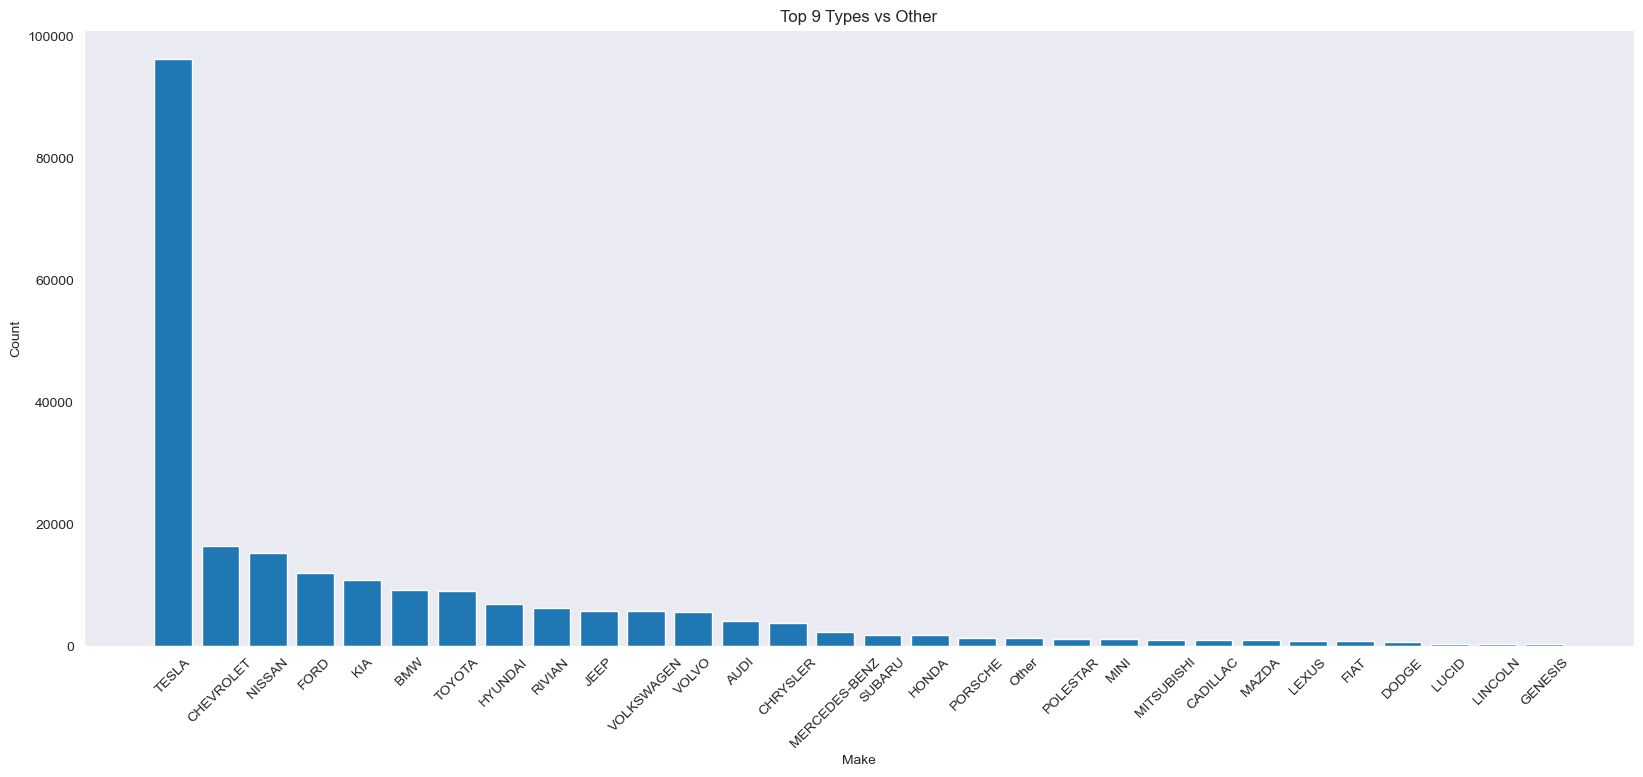

In [286]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

In [287]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VIN                    223995 non-null  object
 1   County                 223995 non-null  object
 2   City                   223995 non-null  object
 3   State                  223995 non-null  object
 4   PostalCode             223995 non-null  int32 
 5   ModelYear              223995 non-null  int64 
 6   Make                   223995 non-null  object
 7   Model                  223995 non-null  object
 8   Electric_Vehicle_Type  223995 non-null  object
 9   CAFV_Eligibility       223995 non-null  object
 10  Electric_Range         223995 non-null  object
 11  Base_MSRP              223995 non-null  object
 12  Legislative_District   223995 non-null  object
 13  DOL_Vehicle_ID         223995 non-null  int64 
 14  Vehicle_Location       223995 non-null  object
 15  

In [288]:
top_types = EVPD['Model'].value_counts().nlargest(29).index
top_types

Index(['MODEL Y', 'MODEL 3', 'LEAF', 'MODEL S', 'BOLT EV', 'MODEL X',
       'MUSTANG MACH-E', 'VOLT', 'ID.4', 'WRANGLER', 'NIRO', 'PACIFICA',
       'IONIQ 5', 'RAV4 PRIME', 'R1S', 'PRIUS PRIME', 'EV6', 'BOLT EUV', 'X5',
       'F-150', 'R1T', 'I3', 'XC90', 'SOLTERRA', 'FUSION', 'I4', 'ARIYA',
       'XC60', 'GRAND CHEROKEE'],
      dtype='object', name='Model')

In [289]:
EVPD['Model_Modified'] = EVPD['Model'].where(EVPD['Model'].isin(top_types), 'Other')
EVPD['Model_Modified']

0         WRANGLER
1          BOLT EV
2               I3
3          MODEL 3
4          MODEL S
            ...   
223990     MODEL Y
223991          I3
223992        LEAF
223993     MODEL 3
223994          I3
Name: Model_Modified, Length: 223995, dtype: object

In [290]:
counts = counts =EVPD['Model_Modified'].value_counts()
counts

Model_Modified
MODEL Y           46583
Other             41190
MODEL 3           34462
LEAF              13735
MODEL S            7765
BOLT EV            7008
MODEL X            6243
MUSTANG MACH-E     4774
VOLT               4720
ID.4               4653
WRANGLER           4292
NIRO               3861
PACIFICA           3733
IONIQ 5            3729
RAV4 PRIME         3515
R1S                3343
PRIUS PRIME        3282
EV6                3203
BOLT EUV           2834
X5                 2813
F-150              2707
R1T                2155
I3                 1934
XC90               1912
SOLTERRA           1737
FUSION             1732
I4                 1554
ARIYA              1524
XC60               1521
GRAND CHEROKEE     1481
Name: count, dtype: int64

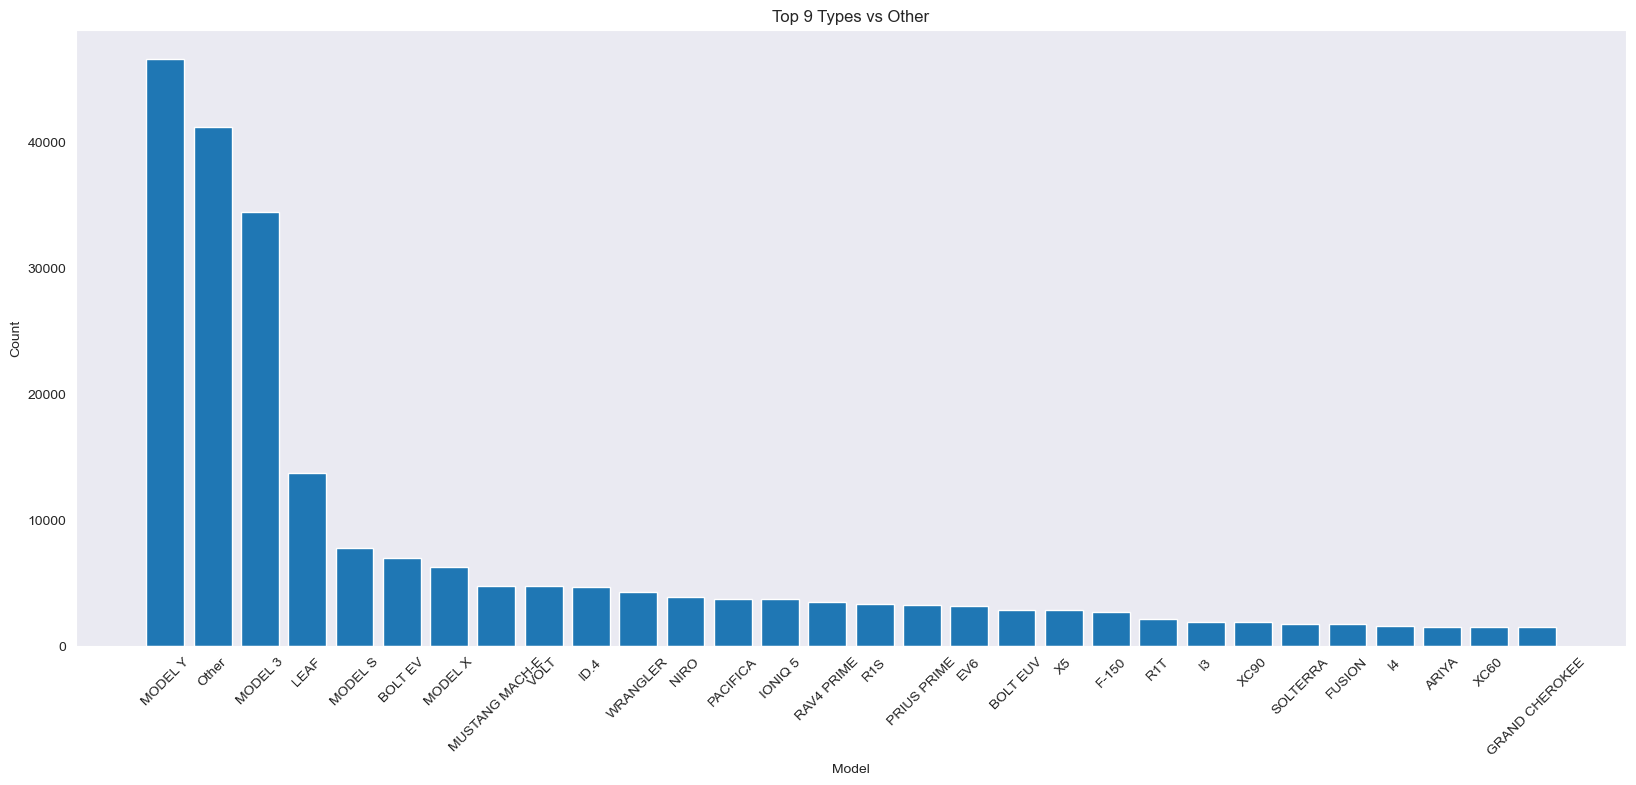

In [291]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

In [292]:
top_types = EVPD['CAFV_Eligibility'].value_counts().nlargest(29).index
top_types

Index(['Eligibility unknown as battery range has not been researched',
       'Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range'],
      dtype='object', name='CAFV_Eligibility')

In [293]:
EVPD['CAFV_Eligibility_Modified'] = EVPD['CAFV_Eligibility'].where(EVPD['CAFV_Eligibility'].isin(top_types), 'Other')
EVPD['CAFV_Eligibility_Modified']

0                     Not eligible due to low battery range
1                   Clean Alternative Fuel Vehicle Eligible
2                   Clean Alternative Fuel Vehicle Eligible
3                   Clean Alternative Fuel Vehicle Eligible
4                   Clean Alternative Fuel Vehicle Eligible
                                ...                        
223990    Eligibility unknown as battery range has not b...
223991    Eligibility unknown as battery range has not b...
223992              Clean Alternative Fuel Vehicle Eligible
223993    Eligibility unknown as battery range has not b...
223994              Clean Alternative Fuel Vehicle Eligible
Name: CAFV_Eligibility_Modified, Length: 223995, dtype: object

In [294]:
counts = counts =EVPD['CAFV_Eligibility_Modified'].value_counts()
counts

CAFV_Eligibility_Modified
Eligibility unknown as battery range has not been researched    130442
Clean Alternative Fuel Vehicle Eligible                          71438
Not eligible due to low battery range                            22115
Name: count, dtype: int64

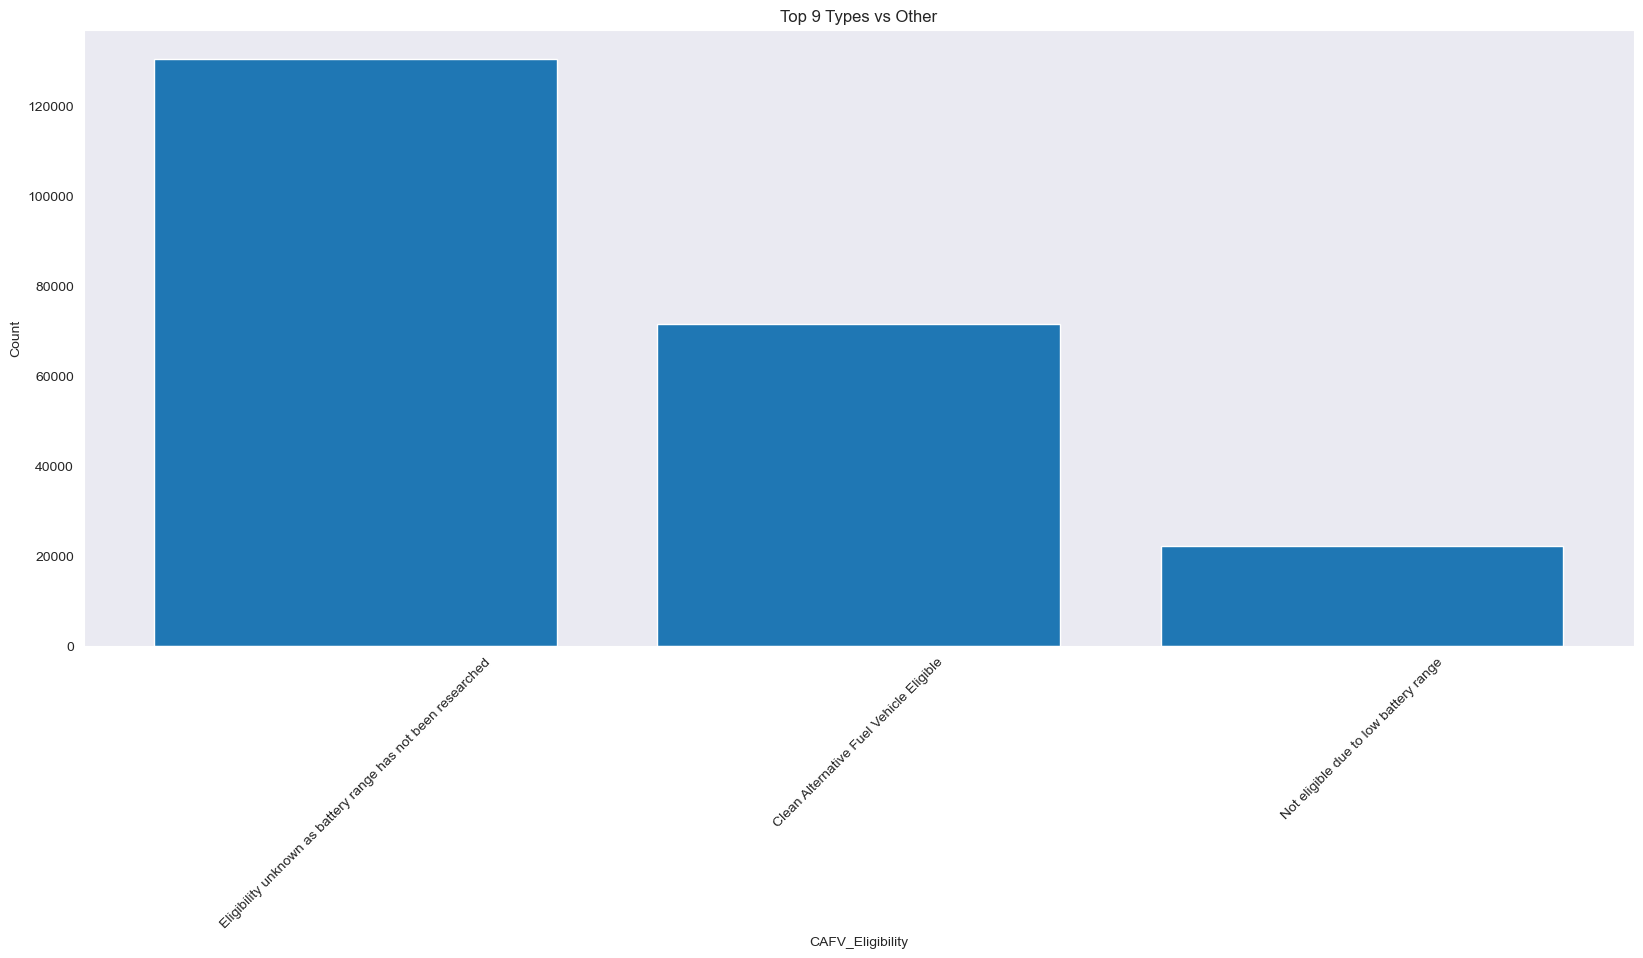

In [295]:
plt.figure(figsize=(20,8))
plt.bar(counts.index, counts.values)
plt.xlabel('CAFV_Eligibility')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

In [296]:
EVPD['Base_MSRP'].value_counts()

Base_MSRP
0.0         220717
69900.0       1315
31950.0        364
52900.0        218
32250.0        139
59900.0        121
54950.0        118
39995.0        117
36900.0        104
44100.0         95
64950.0         88
45600.0         75
52650.0         71
33950.0         71
34995.0         67
55700.0         57
36800.0         54
53400.0         39
81100.0         23
98950.0         22
110950.0        20
0               18
90700.0         17
102000.0        12
75095.0         12
184400.0        11
43700.0          8
109000.0         7
89100.0          7
91250.0          4
32995.0          3
845000.0         1
Name: count, dtype: int64

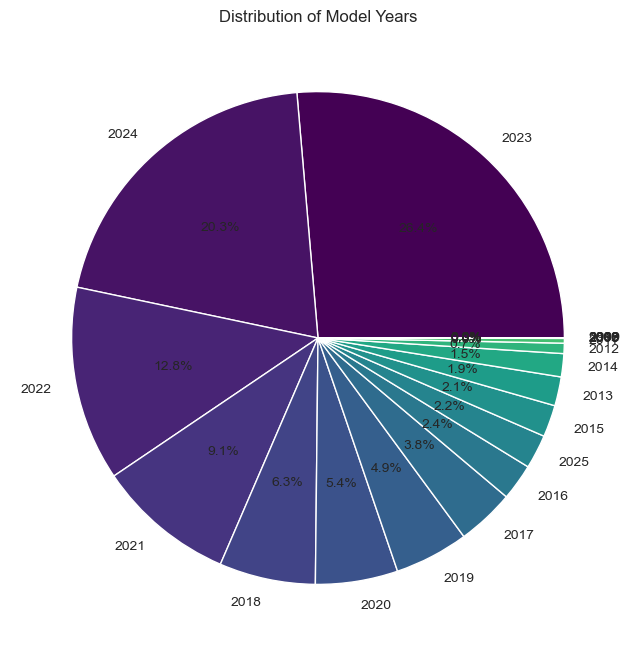

In [297]:
EVPD['ModelYear'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='viridis'
)
plt.title("Distribution of Model Years")
plt.ylabel("") 
plt.show()

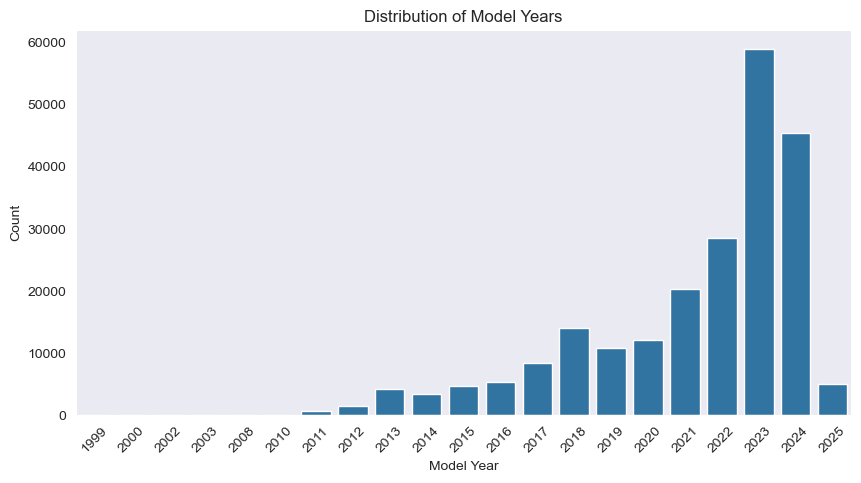

In [298]:
model_counts = EVPD['ModelYear'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.title("Distribution of Model Years")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

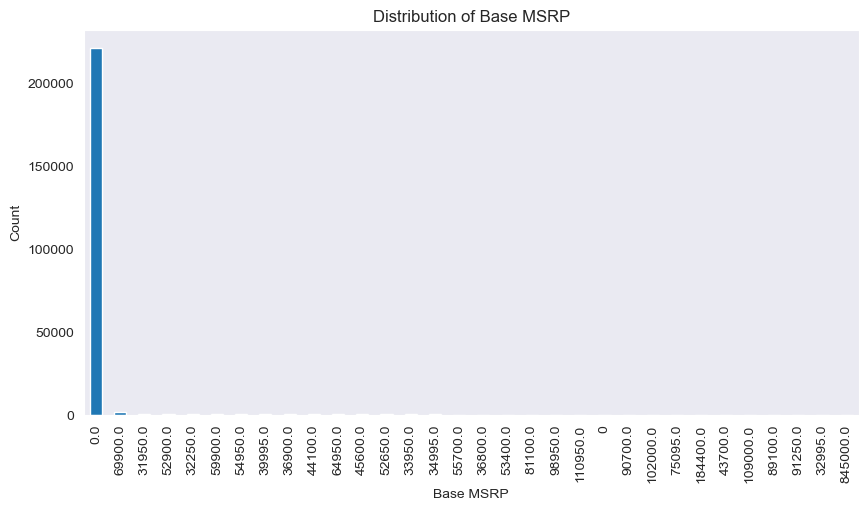

In [299]:
EVPD['Base_MSRP'].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel('Base MSRP')
plt.ylabel('Count')
plt.title('Distribution of Base MSRP')
plt.show()

In [300]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   VIN                        223995 non-null  object
 1   County                     223995 non-null  object
 2   City                       223995 non-null  object
 3   State                      223995 non-null  object
 4   PostalCode                 223995 non-null  int32 
 5   ModelYear                  223995 non-null  int64 
 6   Make                       223995 non-null  object
 7   Model                      223995 non-null  object
 8   Electric_Vehicle_Type      223995 non-null  object
 9   CAFV_Eligibility           223995 non-null  object
 10  Electric_Range             223995 non-null  object
 11  Base_MSRP                  223995 non-null  object
 12  Legislative_District       223995 non-null  object
 13  DOL_Vehicle_ID             223995 non-null  

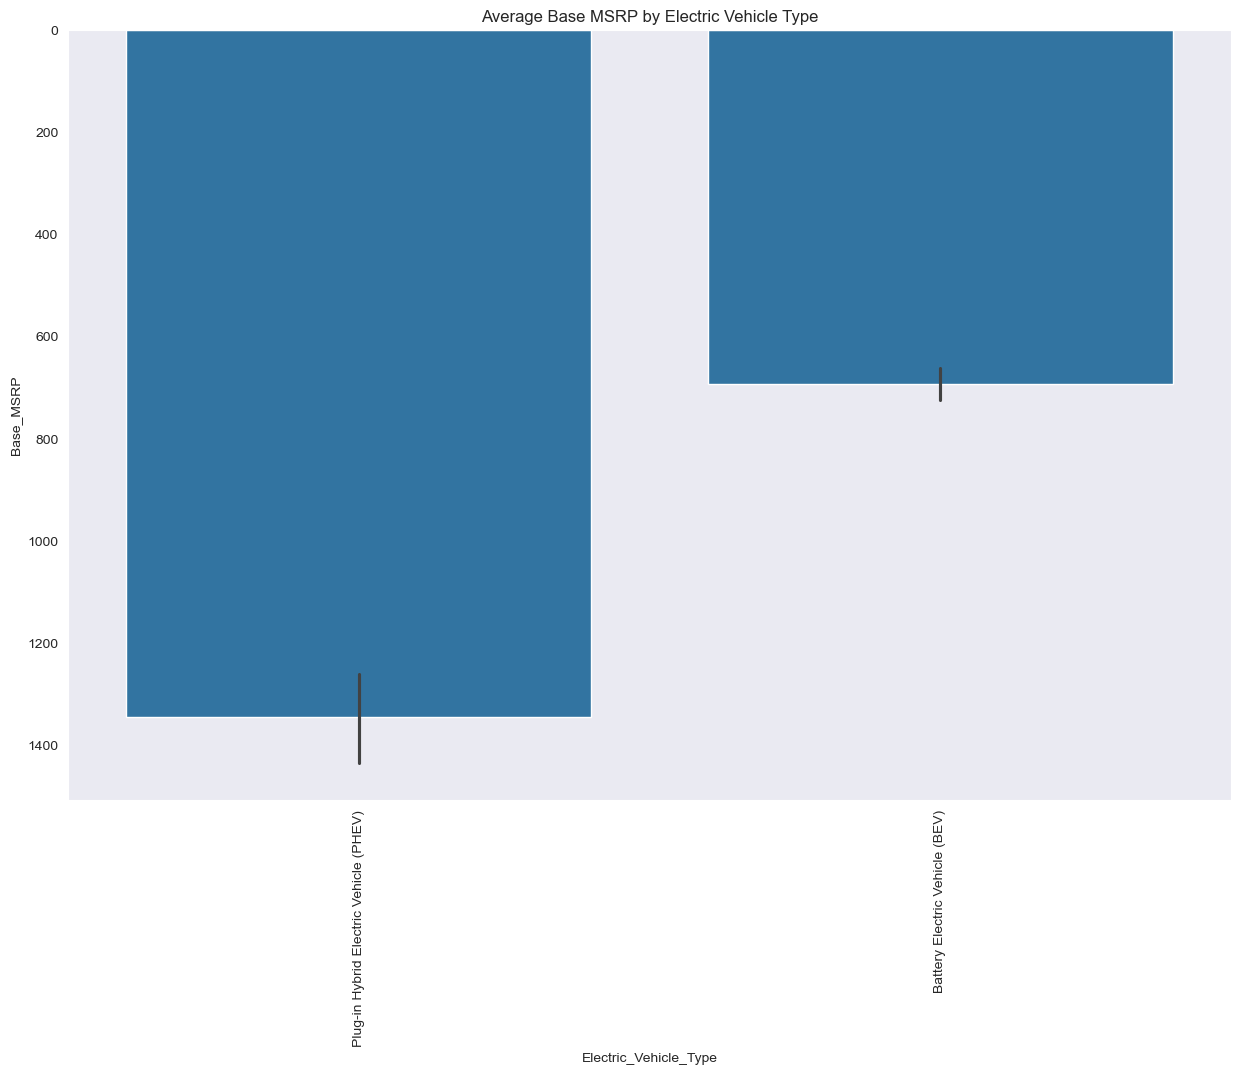

In [301]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="Electric_Vehicle_Type", y="Base_MSRP", data=EVPD, estimator=np.mean)  # Default is mean
plt.xticks(rotation=90)
plt.title("Average Base MSRP by Electric Vehicle Type")
plt.show()

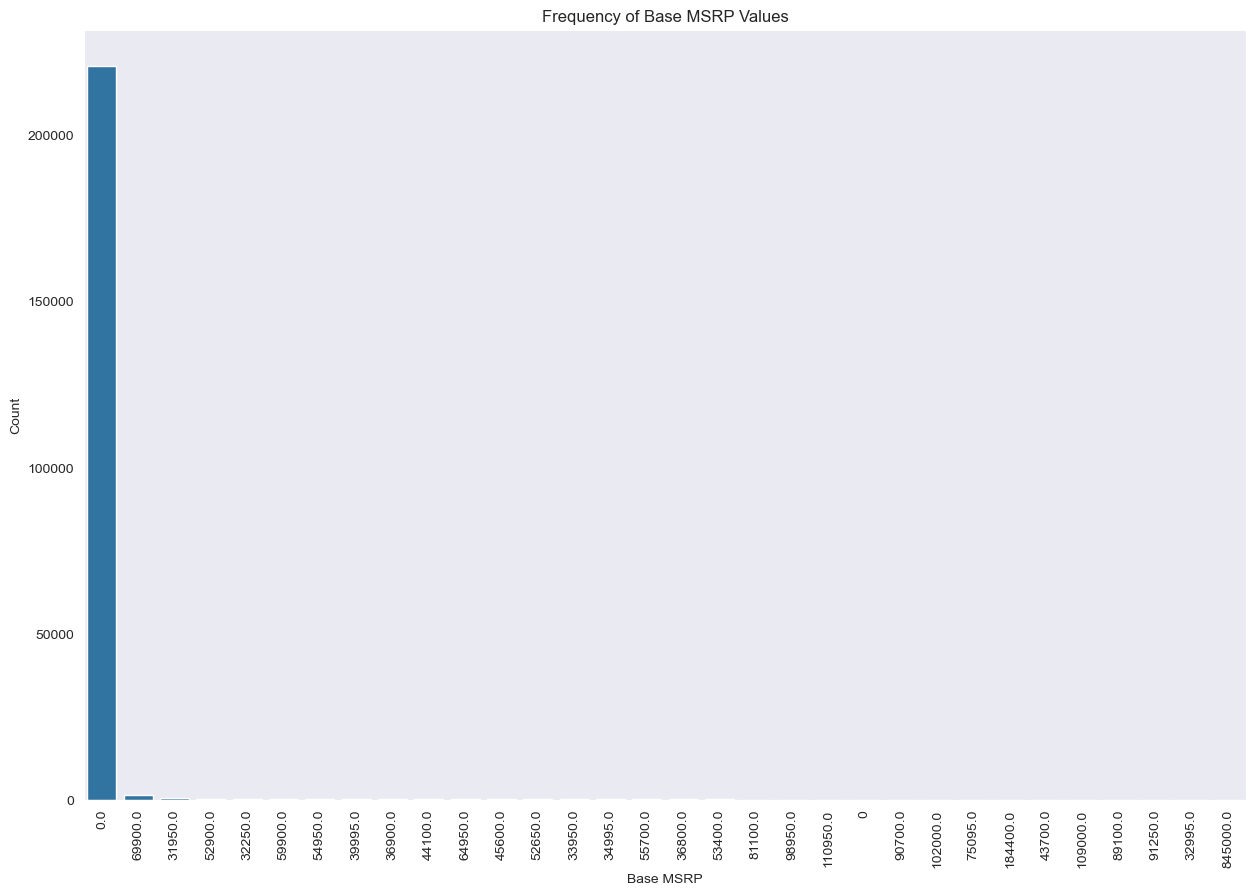

In [302]:
plt.figure(figsize=(15, 10))
sns.barplot(x=EVPD["Base_MSRP"].value_counts().index, 
            y=EVPD["Base_MSRP"].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel("Base MSRP")
plt.ylabel("Count")
plt.title("Frequency of Base MSRP Values")
plt.show()

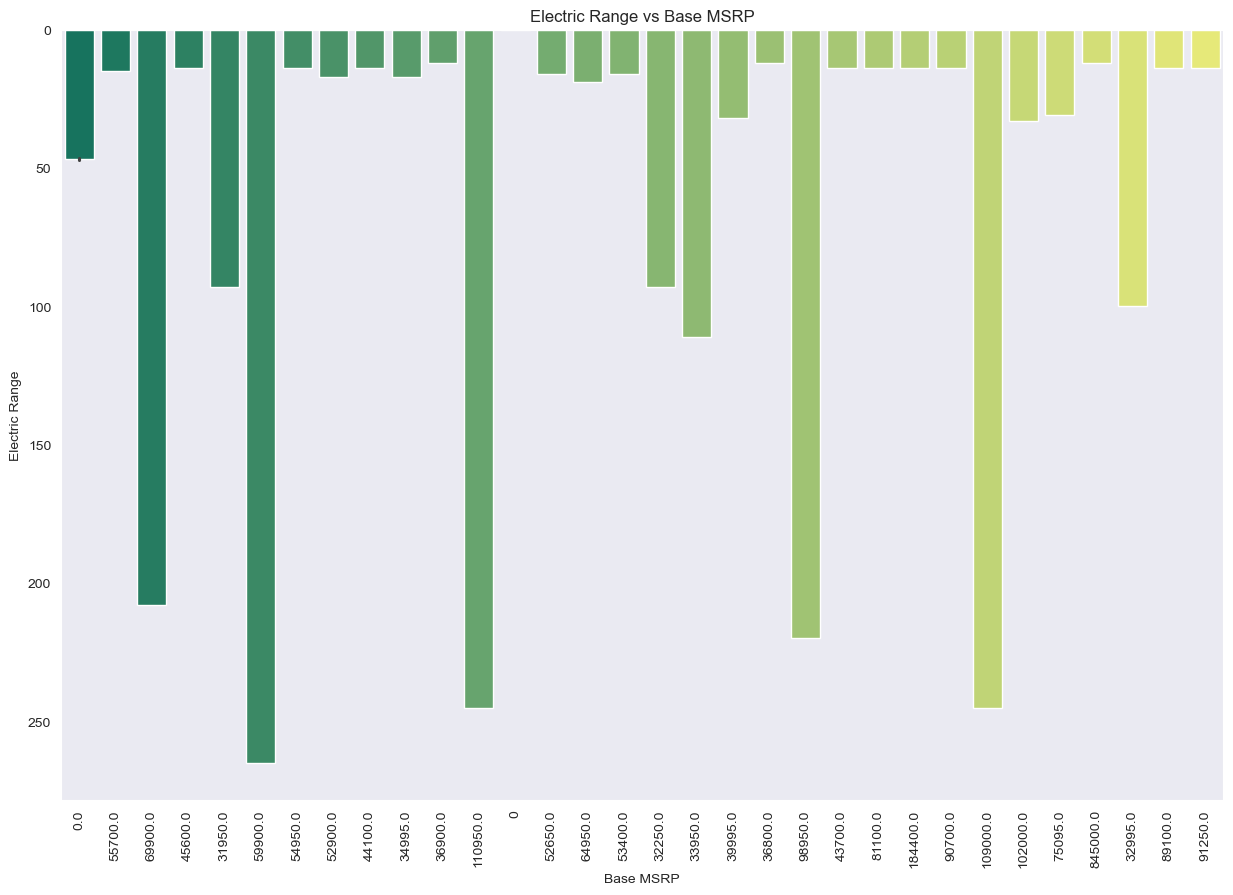

In [303]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="Base_MSRP", y="Electric_Range", data=EVPD, palette='summer')  # Fixed spelling
plt.xticks(rotation=90)
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.show()


<Axes: xlabel='Electric_Utility'>

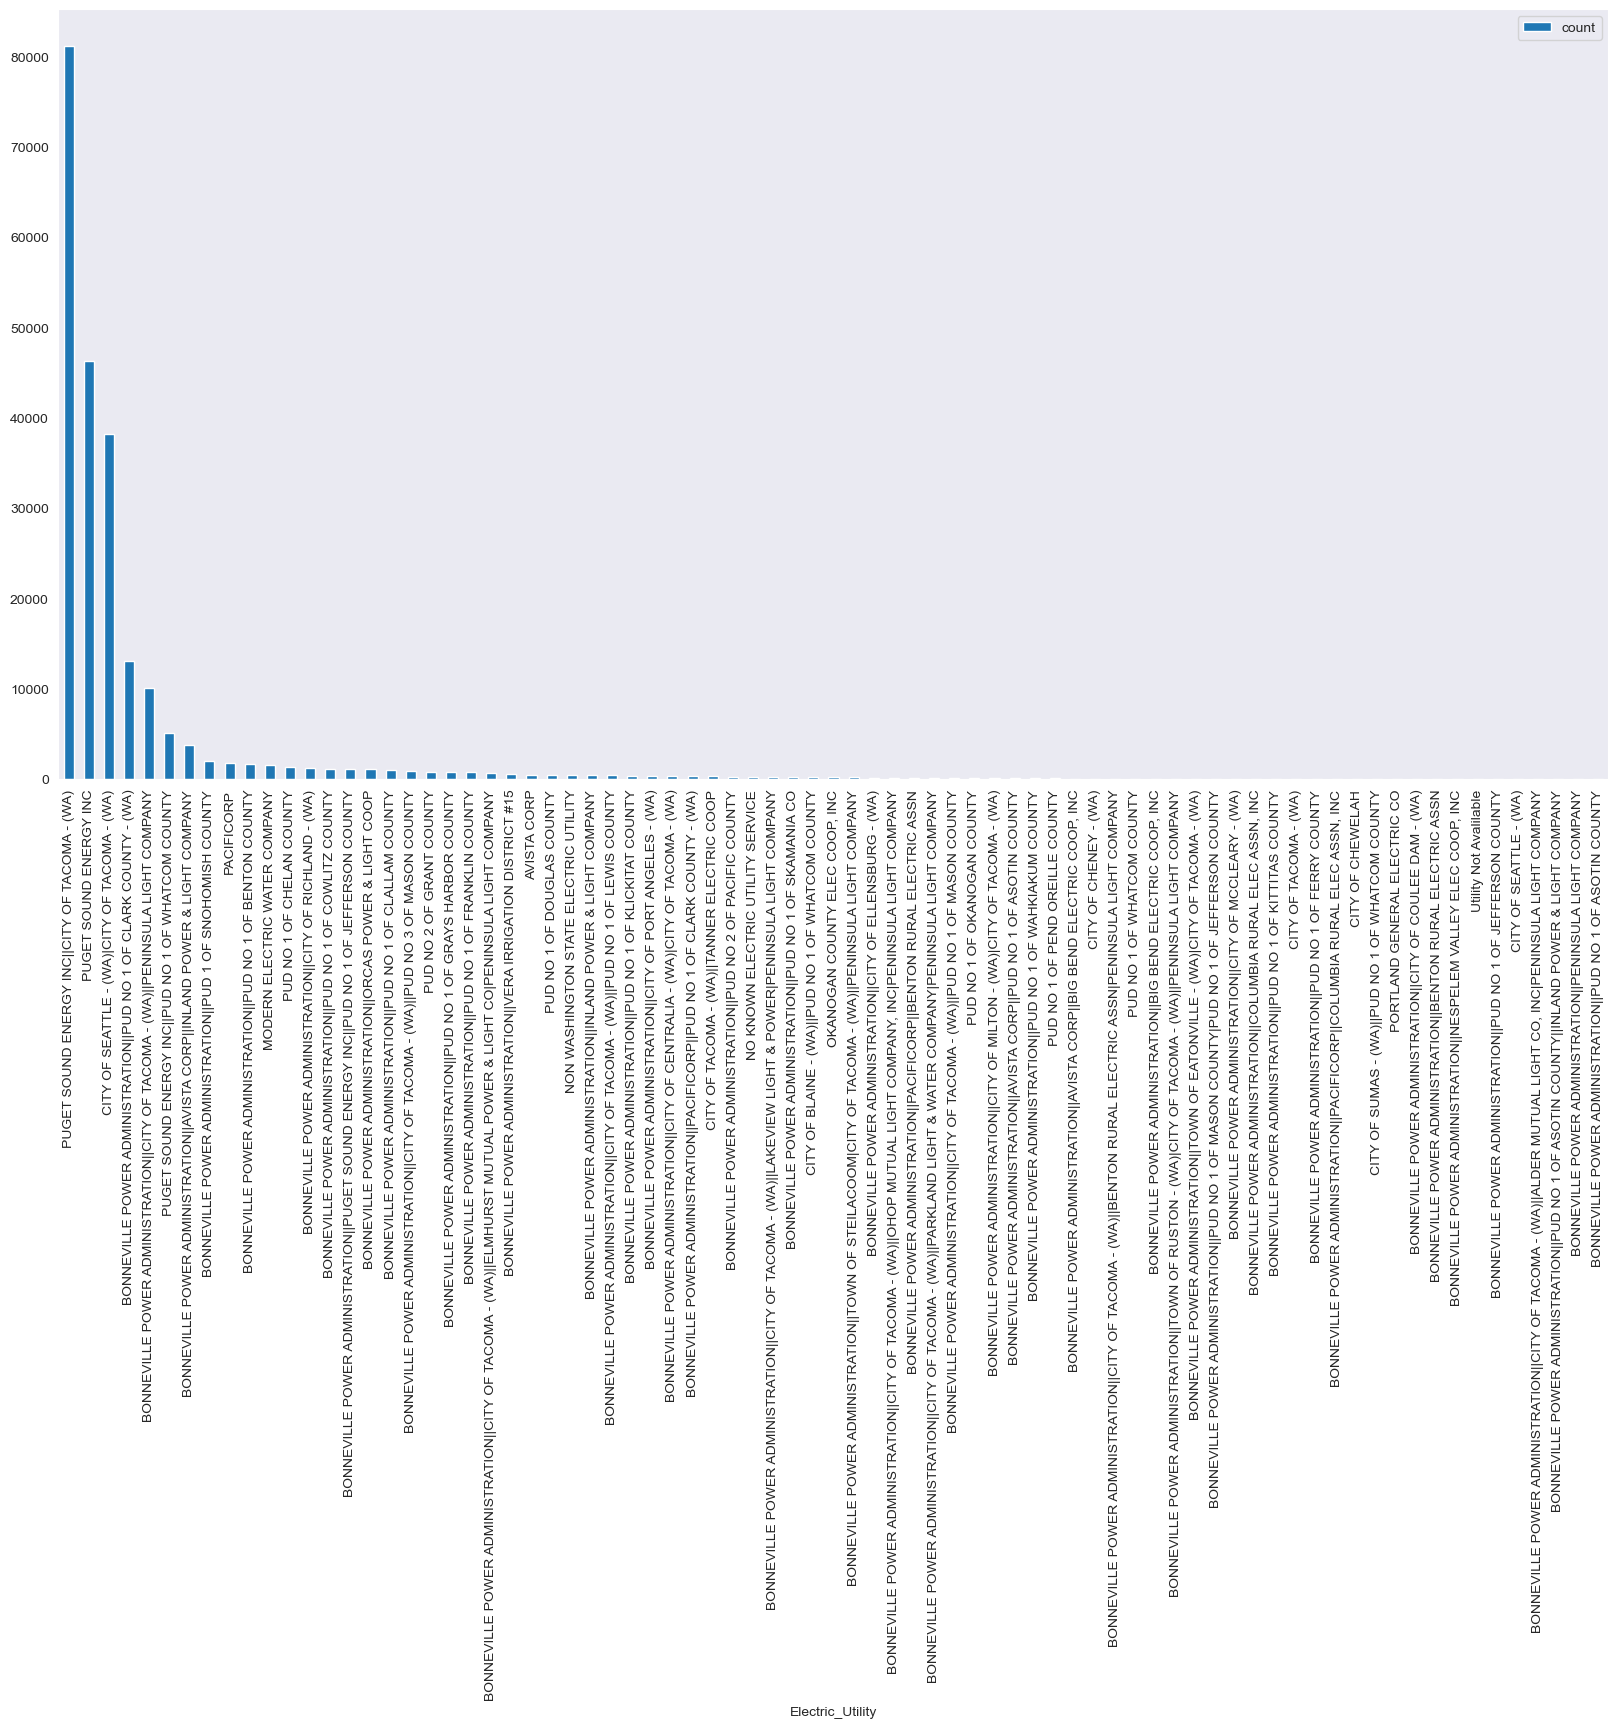

In [304]:
pd.DataFrame(EVPD['Electric_Utility'].value_counts()).plot(kind='bar',figsize=(20,10))


In [305]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   VIN                        223995 non-null  object
 1   County                     223995 non-null  object
 2   City                       223995 non-null  object
 3   State                      223995 non-null  object
 4   PostalCode                 223995 non-null  int32 
 5   ModelYear                  223995 non-null  int64 
 6   Make                       223995 non-null  object
 7   Model                      223995 non-null  object
 8   Electric_Vehicle_Type      223995 non-null  object
 9   CAFV_Eligibility           223995 non-null  object
 10  Electric_Range             223995 non-null  object
 11  Base_MSRP                  223995 non-null  object
 12  Legislative_District       223995 non-null  object
 13  DOL_Vehicle_ID             223995 non-null  

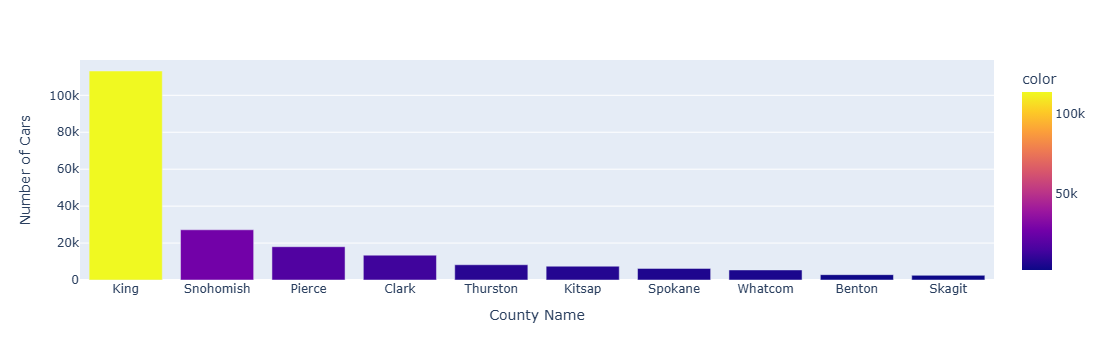

In [306]:
Counties = EVPD.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = EVPD.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10])

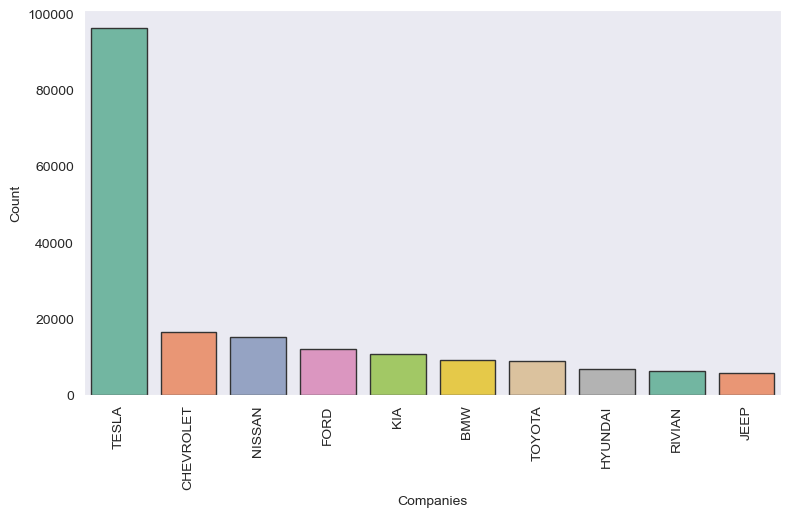

In [307]:
Companies = EVPD.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = EVPD.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

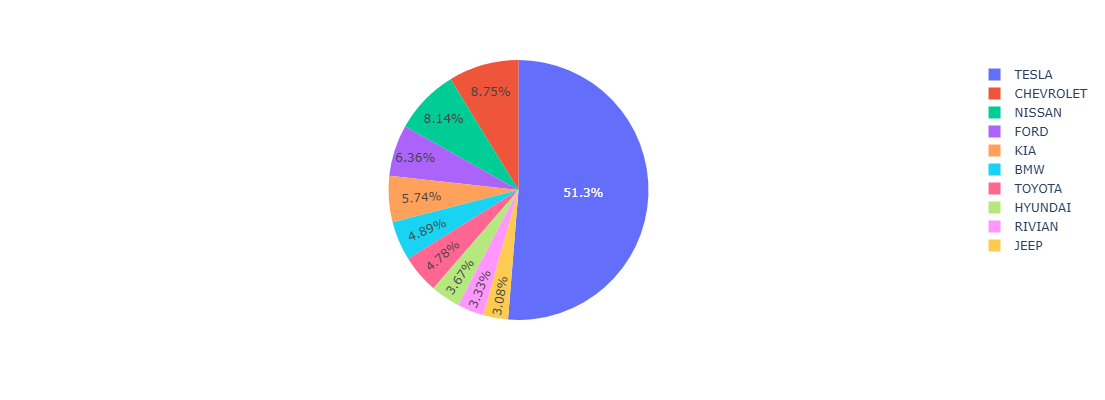

In [308]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

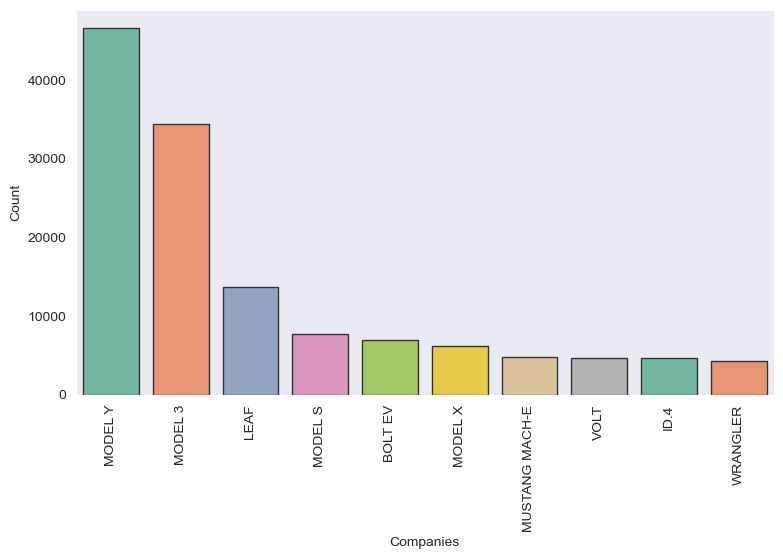

In [309]:
Companies = EVPD.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = EVPD.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [310]:
# Get the actual top 10 companies by frequency of entries (sales)
top_10_companies = EVPD['Make'].value_counts().head(10).index.tolist()

for make in top_10_companies:
    # Filter data for the current company
    company_data = EVPD[EVPD['Make'] == make]
    
    # Count occurrences of each model (use .size() for total rows)
    model_counts = company_data.groupby('Model').size().reset_index(name='Count')
    
    # Sort models by count and get the top one
    top_model = model_counts.sort_values(by='Count', ascending=False).iloc[0]['Model']
    
    print(f'Top selling model for {make} is -----------> {top_model}')

Top selling model for TESLA is -----------> MODEL Y
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for NISSAN is -----------> LEAF
Top selling model for FORD is -----------> MUSTANG MACH-E
Top selling model for KIA is -----------> NIRO
Top selling model for BMW is -----------> X5
Top selling model for TOYOTA is -----------> RAV4 PRIME
Top selling model for HYUNDAI is -----------> IONIQ 5
Top selling model for RIVIAN is -----------> R1S
Top selling model for JEEP is -----------> WRANGLER


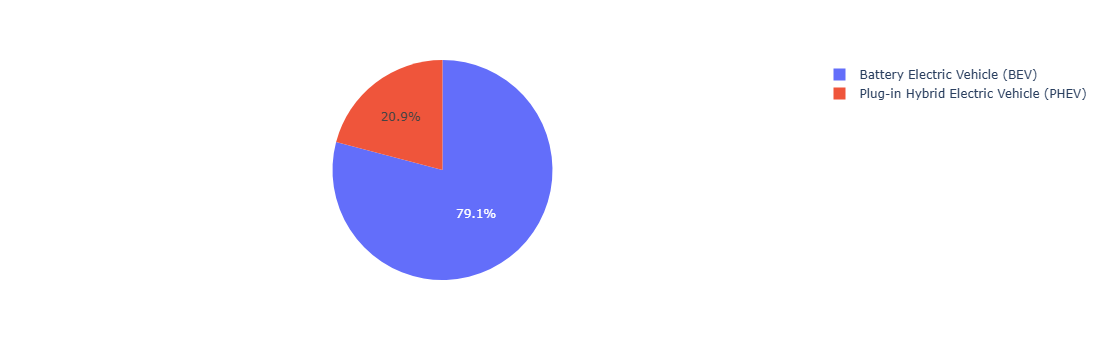

In [311]:

Vehicle_type = list(EVPD.groupby('Electric_Vehicle_Type').count()['County'].index)
values = EVPD.groupby('Electric_Vehicle_Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)

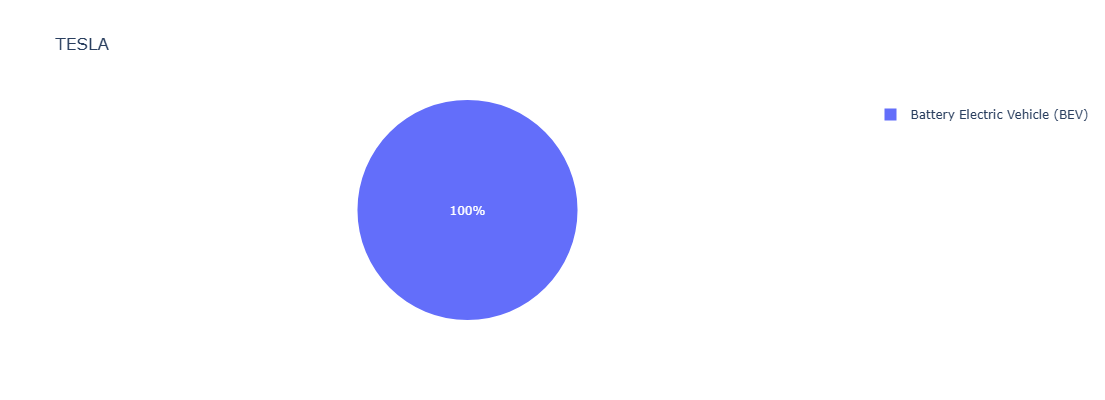

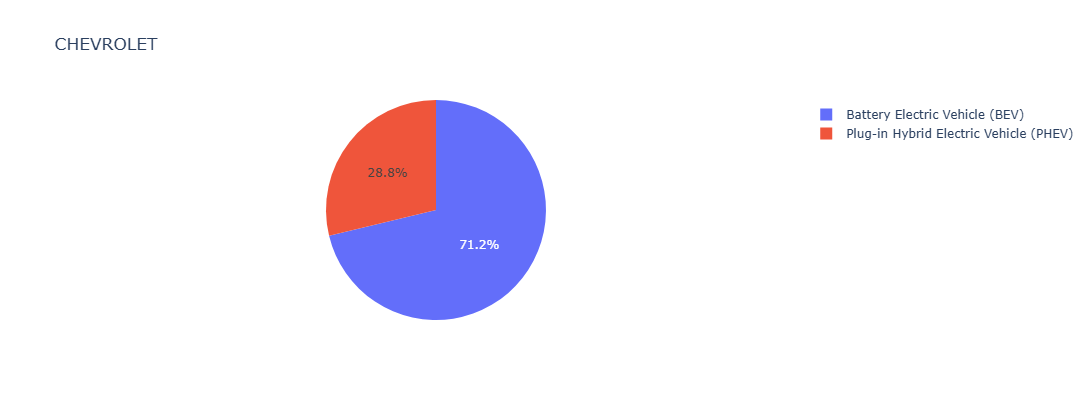

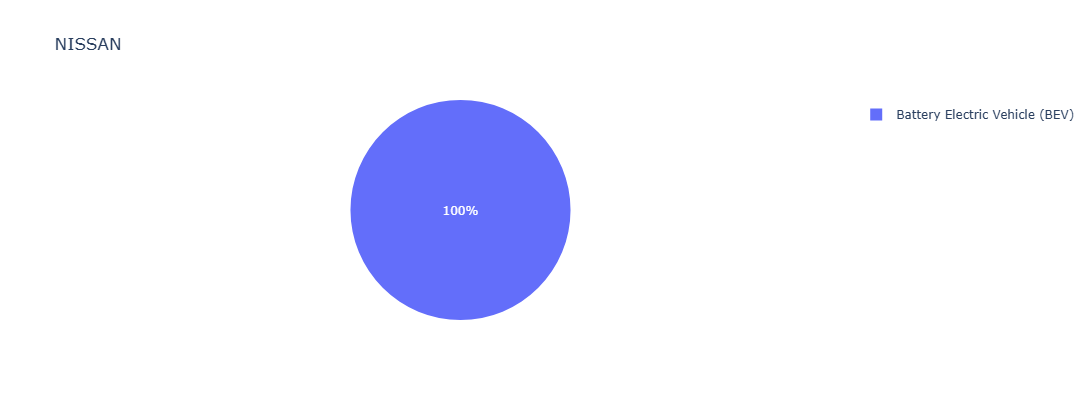

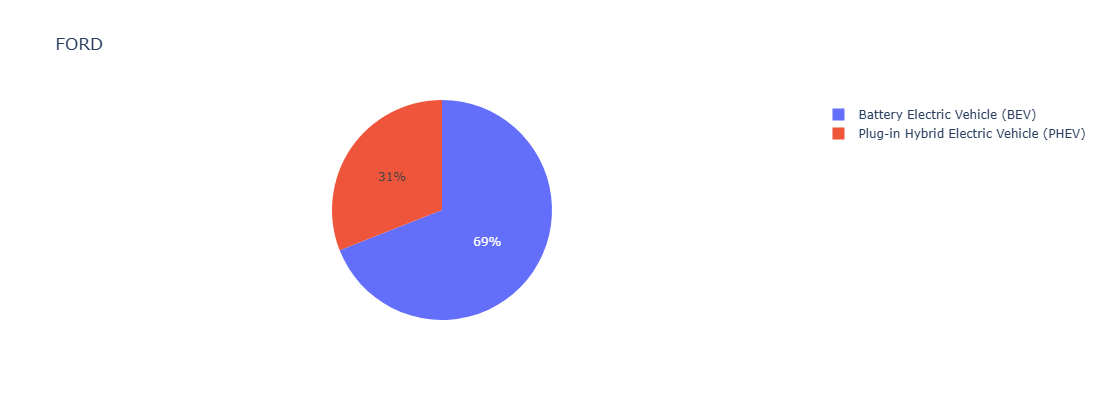

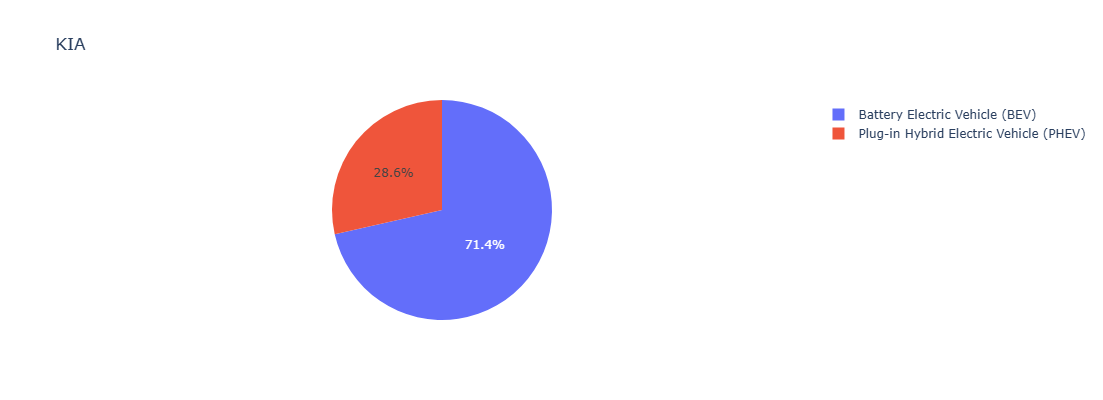

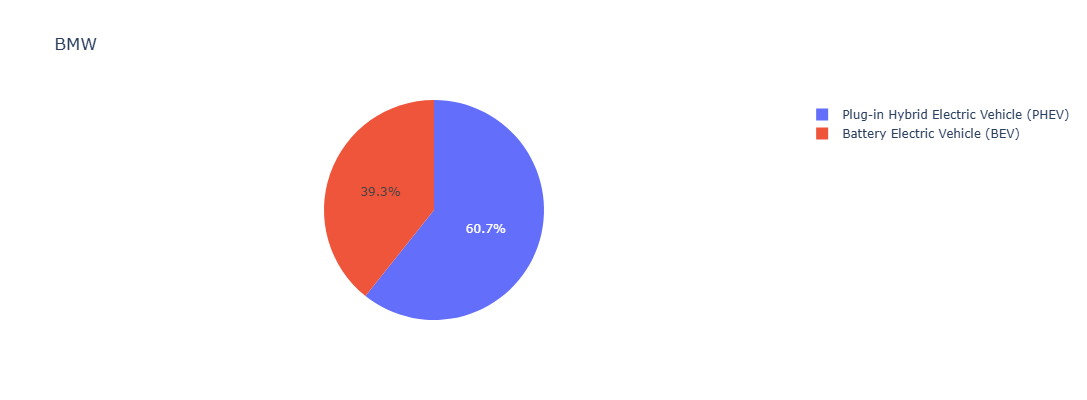

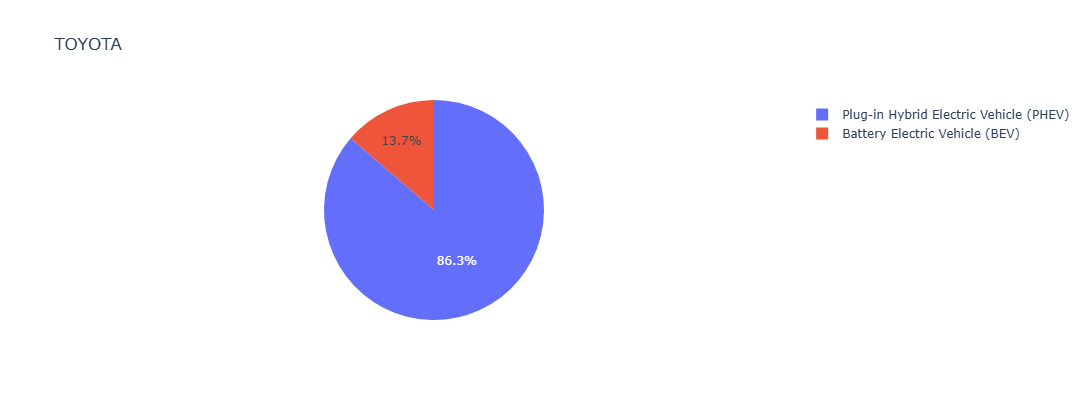

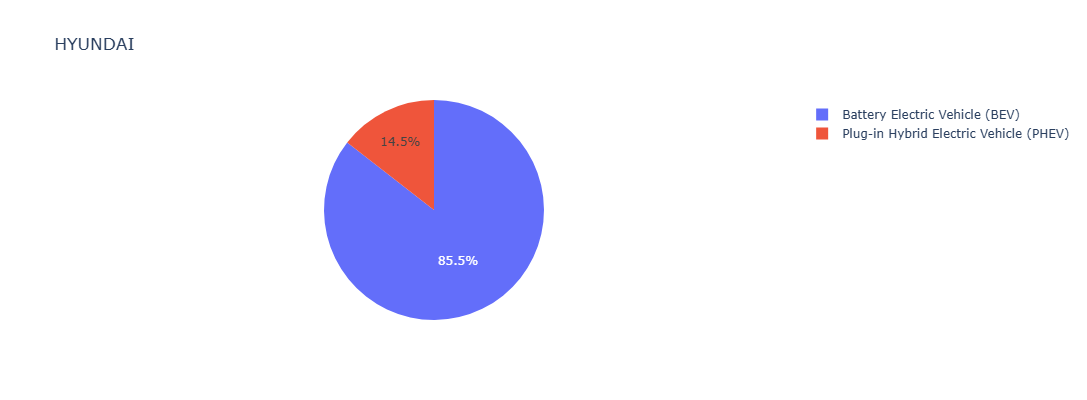

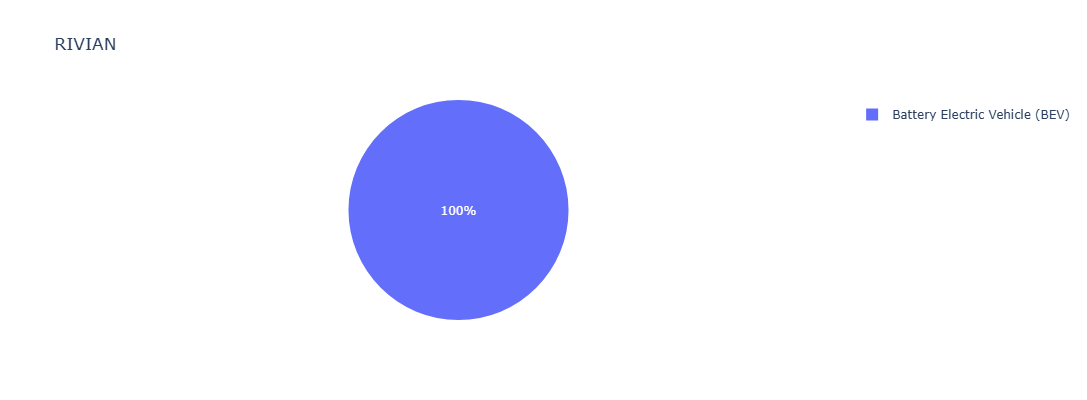

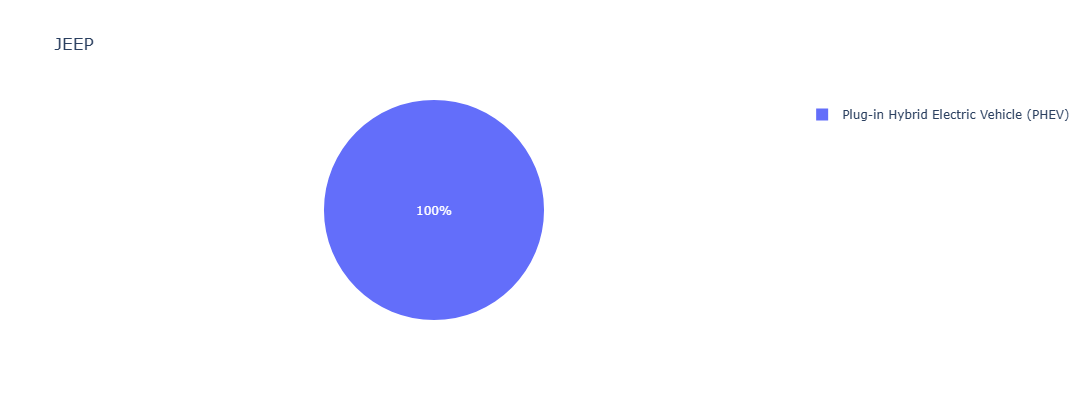

In [312]:
for index,i in enumerate(top_10_companies):
    data = EVPD[EVPD['Make']==i]
    labels = list(data.groupby('Electric_Vehicle_Type').count()['City'].index)
    values = list(data.groupby('Electric_Vehicle_Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<Axes: xlabel='Electric_Range', ylabel='Count'>

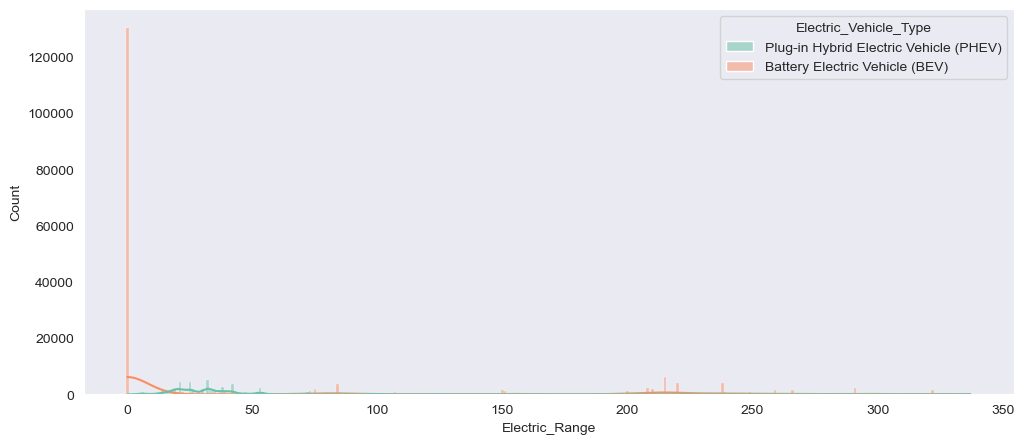

In [313]:
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'Electric_Range',data=EVPD,kde=True,hue='Electric_Vehicle_Type',palette='Set2')

In [314]:
EVPD[EVPD['Electric_Range']==0].shape


(130442, 24)

<Axes: xlabel='Electric_Range', ylabel='Density'>

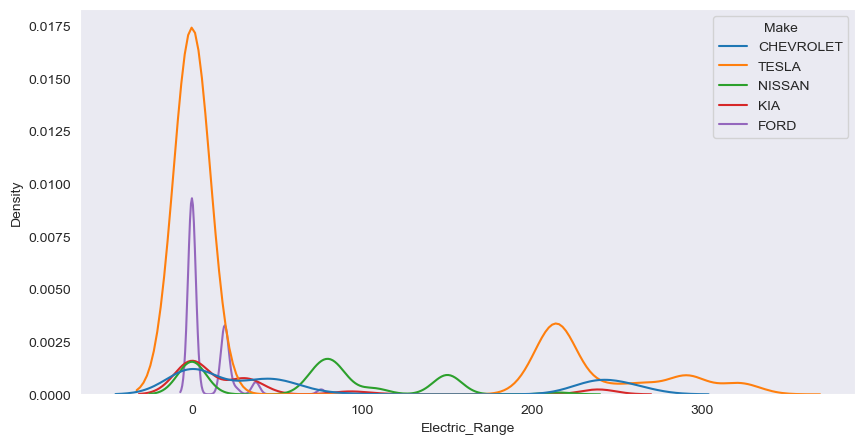

In [315]:

data_bev = EVPD[EVPD['Electric_Vehicle_Type']!='CAFV_Eligibility_Modified']
companies=list(data_bev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_bev['bev'] = data_bev['Make'].apply(lambda x:1 if x in companies else 0 )
data_bev = data_bev[data_bev['bev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric_Range',hue='Make',data=data_bev)

In [316]:
top_10_vehicles = list(EVPD.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]
top_10_vehicles

['MODEL Y',
 'MODEL 3',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'MODEL X',
 'MUSTANG MACH-E',
 'VOLT',
 'ID.4',
 'WRANGLER']

<Axes: xlabel='ModelYear', ylabel='count'>

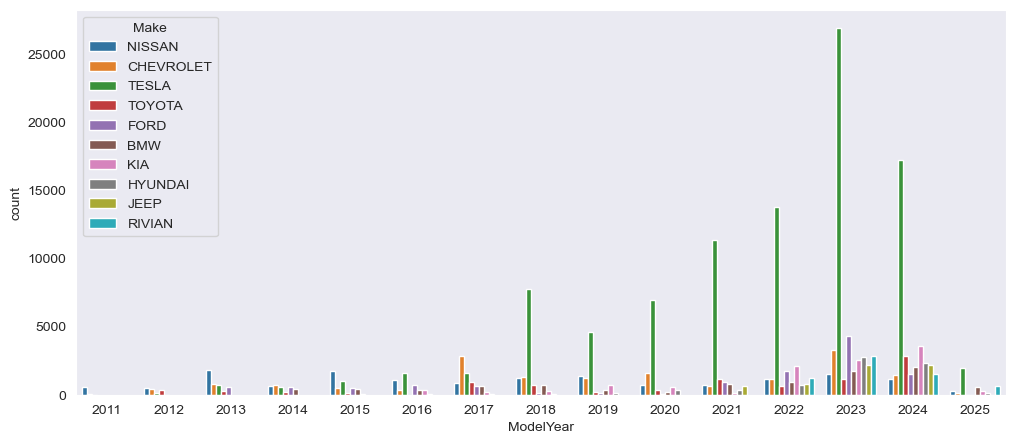

In [317]:
data = EVPD.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['ModelYear']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'ModelYear',hue='Make',data=data)

In [318]:
data_TESLA = EVPD[EVPD['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]


<Axes: >

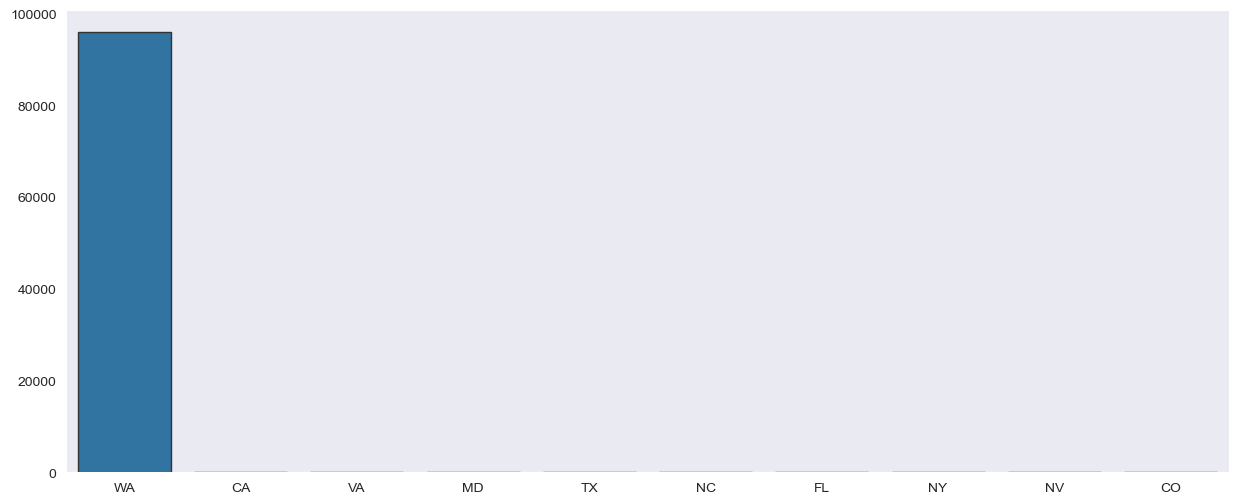

In [319]:
sns.barplot(x = top_10_states_TESLA,y=values,edgecolor='.2')


In [320]:
values

[95951, 60, 24, 19, 17, 14, 9, 7, 6, 6]

<Axes: >

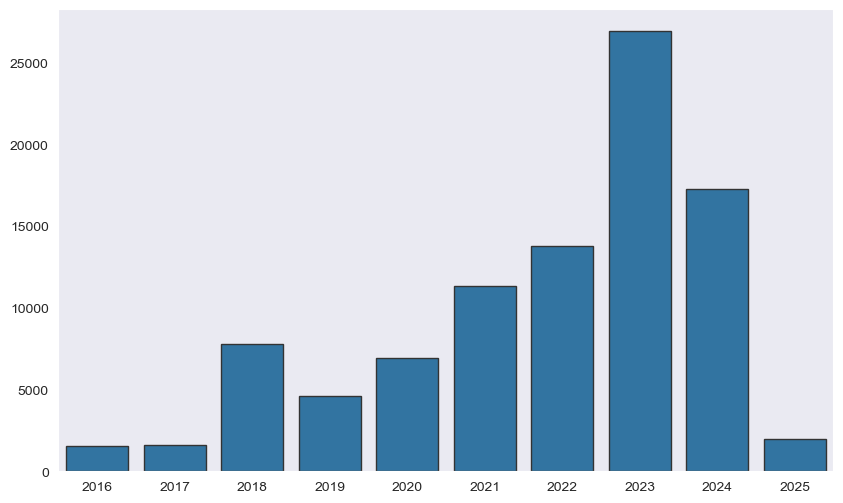

In [321]:
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('ModelYear').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('ModelYear').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')


In [322]:
EVPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   VIN                        223995 non-null  object
 1   County                     223995 non-null  object
 2   City                       223995 non-null  object
 3   State                      223995 non-null  object
 4   PostalCode                 223995 non-null  int32 
 5   ModelYear                  223995 non-null  int64 
 6   Make                       223995 non-null  object
 7   Model                      223995 non-null  object
 8   Electric_Vehicle_Type      223995 non-null  object
 9   CAFV_Eligibility           223995 non-null  object
 10  Electric_Range             223995 non-null  object
 11  Base_MSRP                  223995 non-null  object
 12  Legislative_District       223995 non-null  object
 13  DOL_Vehicle_ID             223995 non-null  

In [323]:
states = list(EVPD.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = EVPD.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [324]:
data = pd.DataFrame(EVPD.groupby('State').count().sort_values(by='City',ascending=False)['City'])


In [325]:
data = data.reset_index()


In [326]:
data.columns = ['State','Count']


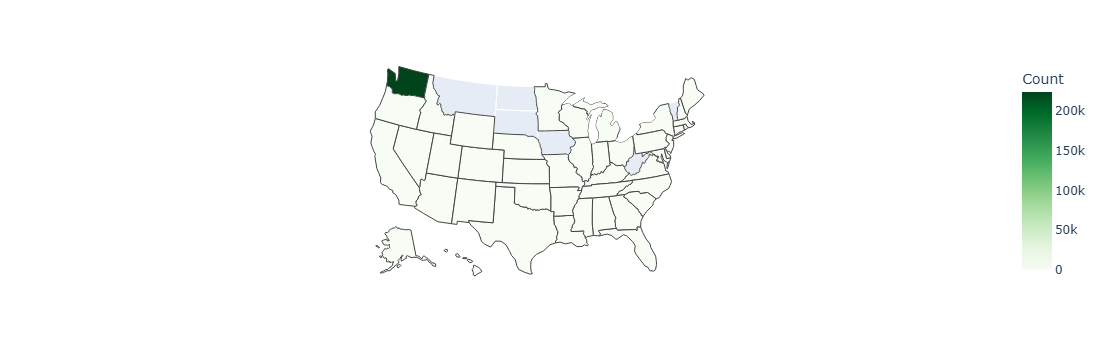

In [327]:
fig = px.choropleth(data,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="greens", 
                    scope="usa")

fig.show()


In [328]:
EVPD.to_csv("cleaned_electric_vehi1.csv")#for Storing clean data